## About Company

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Buisness Statement

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

# **Dataset :**

## Column Profiling:


1. data - tells whether the data is testing or training data

2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique ID for a particular route schedule
4. route_type – Transportation type

    a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

    b. Carting: Handling system consisting of small vehicles (carts)

5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time
11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in kms between source and destination warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
23.segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
24.segment_factor – Unknown field

In [ ]:
# importing libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import f_oneway,chi2_contingency,chisquare
from scipy.stats import pearsonr,spearmanr
from scipy.stats import levene,kruskal,shapiro
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer


In [ ]:
# Loading the data set
df = pd.read_csv("delhivery_data.csv")


In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


# Exploatory Data Analysis

In [ ]:
df.shape #shape of datset

(144867, 24)

In [ ]:
df.info() #infomation about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.nunique() #number of unique values in the column

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [ ]:
#Finding the missing values in the dataset columns
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


We can observe the missing values in source_name and destination_name columns

In [ ]:
# droping the missing values
df.drop(df[df["source_name"].isna()|df["destination_name"].isna()].index,inplace=True)
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [ ]:
df.describe() # statistical summary of the dataset where columns are numerical

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


In [ ]:
df.describe(include="object") # descriptipon of columns where they are object

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316
unique,2,14787,1497,2,14787,1496,1496,1466,1466,26223,26223,92894
top,training,2018-09-25 04:21:12.551117,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153784927255069118,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104632,101,1812,99132,101,23267,23267,15192,15192,81,81,39


In [ ]:
# in segment_actual_time some values are negative as time cannot be negative we remove negative values
df.drop(df[df["segment_actual_time"]<0].index,inplace=True)

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144295.000000,144295.000000,144295.000000,144295.000000,144295.000000,144295.000000,144295.000000,144295.000000,144295.000000,144295.000000,144295.000000
mean,963.661464,233.545868,234.692328,417.977518,214.421809,285.529493,2.120261,36.186736,18.495450,22.818498,2.219425
std,1038.063990,345.231292,345.465611,598.921612,308.435220,421.700446,1.717152,53.514349,14.773917,17.865973,4.854418
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,0.000000,0.000000,0.000000,-1.000000
25%,161.000000,22.000000,23.351299,51.000000,27.000000,29.894250,1.604574,20.000000,11.000000,12.053950,1.347826
50%,451.000000,66.000000,66.134706,132.000000,64.000000,78.620800,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.916314,516.000000,259.000000,346.259000,2.212445,40.000000,22.000000,27.813100,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


# Univariate Analysis

<Axes: xlabel='start_scan_to_end_scan', ylabel='Count'>

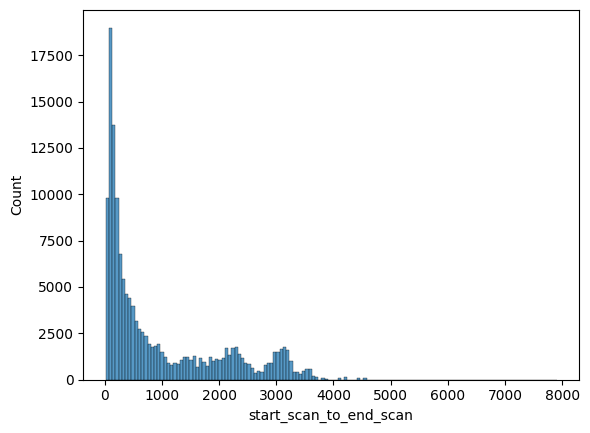

In [ ]:
sns.histplot(df["start_scan_to_end_scan"])
# Histplot for start_scan_to_end_scan attribute

<Axes: xlabel='actual_distance_to_destination', ylabel='Count'>

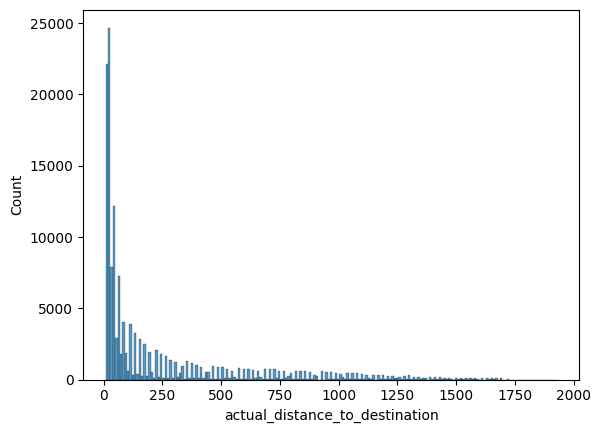

In [ ]:
# Histplot for actual_distance_to_distination
sns.histplot(df["actual_distance_to_destination"])

<Axes: xlabel='segment_actual_time', ylabel='Count'>

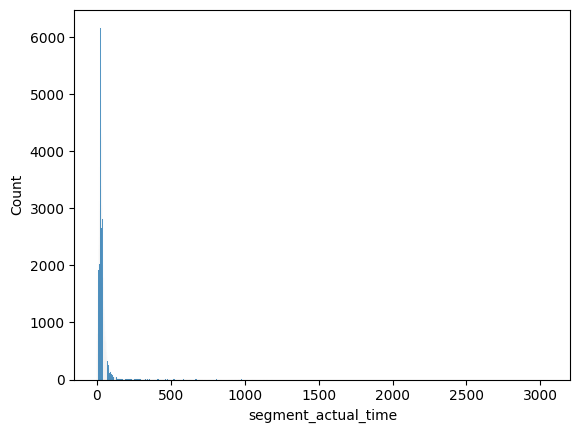

In [ ]:
#Histplot for segment_actual_time
sns.histplot(df["segment_actual_time"])

<Axes: xlabel='actual_time', ylabel='Count'>

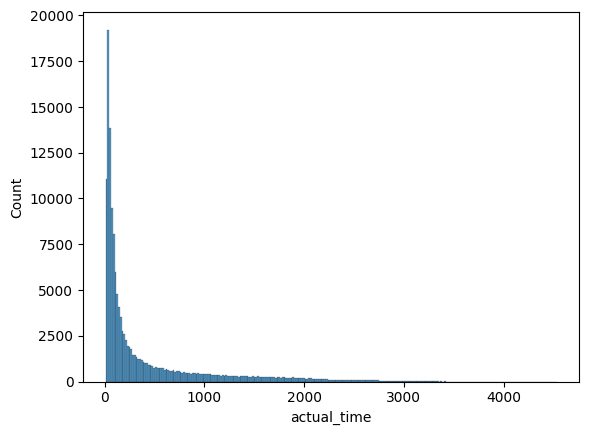

In [ ]:
#Histplot for actual_time attribute
sns.histplot(df["actual_time"])

# Bivariate Analysis

<Axes: xlabel='actual_distance_to_destination', ylabel='actual_time'>

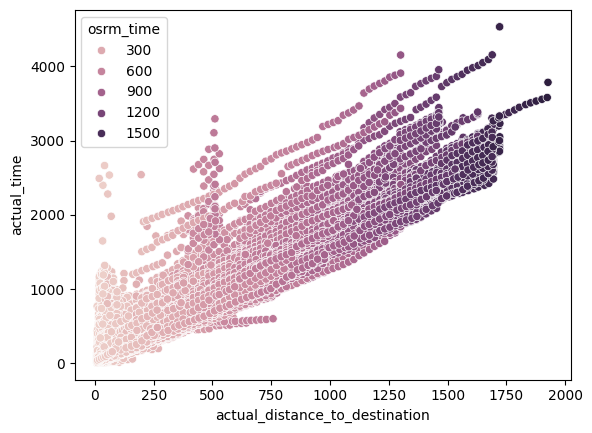

In [ ]:
# Sctterplot between actual distance to destination , actual time and osrm time.
sns.scatterplot(x="actual_distance_to_destination",data=df,y="actual_time",hue="osrm_time")

This visualization can help to understand if there is a correlation between these three variables and how OSRM's estimated time compares to the actual time taken for deliveries based on distance.

<Axes: xlabel='segment_osrm_distance', ylabel='segment_osrm_time'>

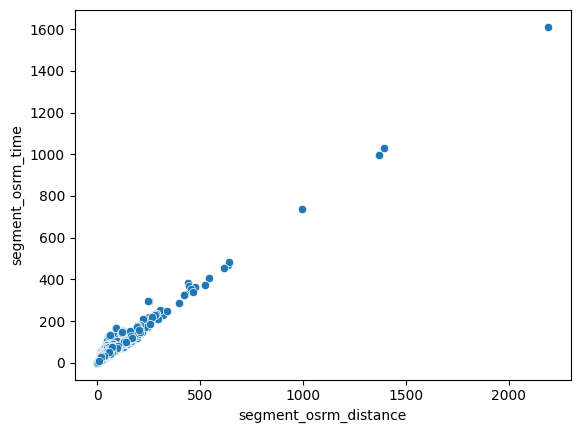

In [ ]:
sns.scatterplot(data=df,x="segment_osrm_distance",y="segment_osrm_time")
# scatter plot to understand relation between segment osrm distance and osrm time

This plot helps to understand the relationship between the OSRM estimated distance and time for individual segments of the delivery route

<Axes: xlabel='segment_actual_time', ylabel='segment_osrm_time'>

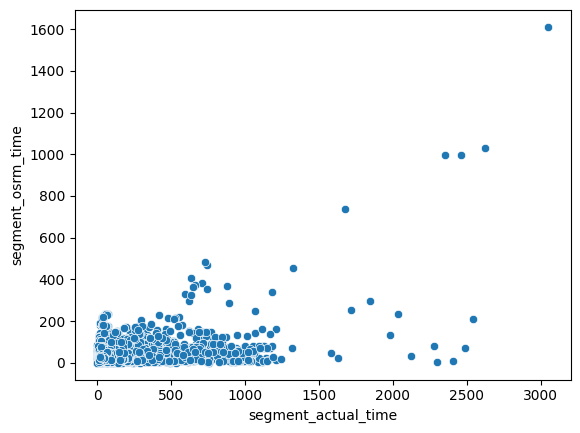

In [ ]:
#scatterplot between segment_actual_time and segment_osrm_time
sns.scatterplot(data=df,x="segment_actual_time",y="segment_osrm_time")

This plot helps to compare the actual time taken for a delivery segment with the time estimated by OSRM.


Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor'],
      dtype='object')


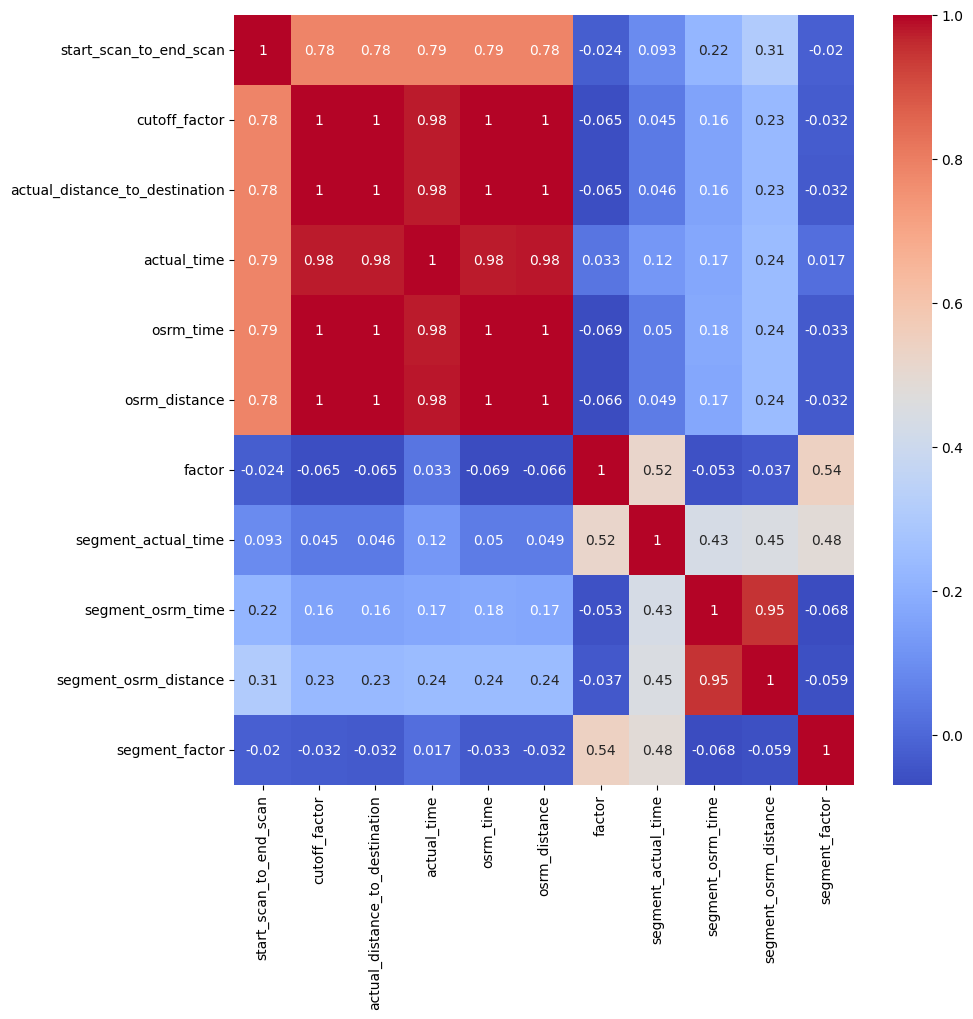

In [ ]:
# lets understand corelation between columns in the data
numeric_columns = df.select_dtypes(include=["float64","int64"]).columns
correlation_matrix = df[numeric_columns].corr()
print(numeric_columns)
#lets create a heat map for it.
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.show()

# Data Pre-Processing

In [ ]:
# date time formatting of date columns
df["trip_creation_time"]=pd.to_datetime(df["trip_creation_time"])
df["od_start_time"]=pd.to_datetime(df["od_start_time"])
df["od_end_time"]=pd.to_datetime(df["od_end_time"])
df["cutoff_timestamp"]=pd.to_datetime(df["cutoff_timestamp"],format="mixed")

In [ ]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


# Merging of rows and aggregation of fields

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows.

In [ ]:
#merging of rows based on trip_id and source and destination details
data=df.groupby(["route_type","trip_uuid","trip_creation_time","source_center","source_name","destination_center","destination_name","od_start_time","od_end_time","start_scan_to_end_scan"]).aggregate({"cutoff_factor":"max","actual_distance_to_destination":"max","segment_actual_time":"sum", "segment_osrm_time":"sum", "actual_time":"max", "osrm_time":"max","osrm_distance":"max","segment_osrm_distance":"sum"}).reset_index()
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,segment_actual_time,segment_osrm_time,actual_time,osrm_time,osrm_distance,segment_osrm_distance
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24,24.644021,46.0,26.0,47.0,26.0,28.1994,28.1995
1,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48,48.542890,95.0,39.0,96.0,42.0,56.9116,55.9899
2,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17,17.175274,59.0,16.0,59.0,15.0,19.6800,19.8766
3,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 03:13:03.432532,60.0,15,15.325529,39.0,12.0,40.0,12.0,16.2225,16.2225
4,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 00:02:34.161600,2018-09-12 02:12:10.755603,129.0,9,9.271519,21.0,11.0,21.0,11.0,11.8422,11.8422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26218,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:42:21.856227,2018-10-04 19:57:34.928573,1215.0,442,442.024575,991.0,425.0,997.0,395.0,545.1256,573.6479
26219,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 04:01:41.425627,132.0,50,50.473578,129.0,55.0,130.0,54.0,61.9571,67.2659
26220,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND384205AAA,Mehsana_Panchot_IP (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-03 23:43:58.933947,2018-10-04 01:48:54.382343,124.0,34,34.270235,57.0,37.0,57.0,38.0,40.4257,40.4256
26221,FTL,trip-153861118270144424,2018-10-03 23:59:42.701692,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40,40.546740,233.0,42.0,233.0,42.0,52.5303,52.5303


In [ ]:
data=data.groupby(["route_type","trip_uuid","trip_creation_time"]).aggregate({"source_center":"first","source_name":"first","destination_center":"last",
                                     "destination_name":"last", "od_start_time":"first",
                                     "od_end_time":"last","cutoff_factor":"sum","actual_distance_to_destination":"sum","osrm_distance":"sum",
                                     "start_scan_to_end_scan":"sum", "segment_actual_time":"sum",
                                    "segment_osrm_time":"sum","actual_time":"sum",
                                     "osrm_time":"sum","segment_osrm_distance":"sum"}).reset_index()
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,72,73.186911,85.1110,180.0,141.0,65.0,143.0,68.0,84.1894
1,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17,17.175274,19.6800,100.0,59.0,16.0,59.0,15.0,19.8766
2,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,24,24.597048,28.0647,189.0,60.0,23.0,61.0,23.0,28.0647
3,Carting,trip-153671066201138152,2018-09-12 00:04:22.011653,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,9,9.100510,12.0184,98.0,24.0,13.0,24.0,13.0,12.0184
4,Carting,trip-153671066826362165,2018-09-12 00:04:28.263977,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,22,22.424210,28.9203,146.0,64.0,34.0,64.0,34.0,28.9203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,FTL,trip-153861004148234782,2018-10-03 23:40:41.482736,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,168.396341,207.4975,428.0,347.0,220.0,349.0,220.0,209.4499
14783,FTL,trip-153861007249500192,2018-10-03 23:41:12.495257,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-10-03 23:41:12.495257,2018-10-04 16:40:41.713085,192,194.552260,229.2052,1017.0,845.0,178.0,847.0,178.0,232.5811
14784,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-05 02:44:50.858859,2018-10-04 19:57:34.928573,835,836.072017,997.7577,2180.0,1660.0,891.0,1674.0,724.0,1166.3614
14785,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 01:48:54.382343,84,84.743813,102.3828,256.0,186.0,92.0,187.0,92.0,107.6915


In [ ]:
data.nunique()

,0
route_type,2
trip_uuid,14787
trip_creation_time,14787
source_center,930
source_name,930
destination_center,1035
destination_name,1035
od_start_time,14787
od_end_time,14787
cutoff_factor,684


In [ ]:
data.isnull().sum()

,0
route_type,0
trip_uuid,0
trip_creation_time,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0
od_end_time,0
cutoff_factor,0


In [ ]:
data.describe()

,trip_creation_time,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance
count,14787,14787,14787,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.00000
mean,2018-09-22 12:26:28.269885696,2018-09-22 14:39:56.325738496,2018-09-22 20:49:39.860267008,163.379523,164.290730,204.631953,529.442754,353.118618,180.482924,356.316224,161.667072,222.66823
min,2018-09-12 00:00:16.535741,2018-09-12 00:01:00.113710,2018-09-12 00:50:10.814399,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.07290
25%,2018-09-17 02:38:18.128431872,2018-09-17 05:23:23.166219520,2018-09-17 11:01:12.272902912,22.000000,22.840056,30.875600,149.000000,66.000000,30.000000,67.000000,29.000000,32.57885
50%,2018-09-22 03:39:19.609193984,2018-09-22 05:37:28.196830976,2018-09-22 12:46:03.655276032,48.000000,48.376934,65.575600,279.000000,147.000000,65.000000,148.000000,60.000000,69.78420
75%,2018-09-27 19:23:14.074359552,2018-09-27 20:42:21.489692672,2018-09-28 02:23:08.496503040,162.000000,163.685113,207.087600,632.000000,364.000000,184.000000,367.000000,168.000000,216.46395
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,2185.000000,2187.483994,2840.081000,7898.000000,6230.000000,2564.000000,6265.000000,2032.000000,3523.63240
std,NaN,NaN,NaN,305.558531,305.678137,370.953239,658.286556,556.439155,314.622727,561.528033,272.406218,416.76499


# Feature Engineering

Build some features to prepare the data for actual analysis. Extract features from the below fields:

1. Destination Name: Split and extract features out of destination. City-place-code (State)
2. Source Name: Split and extract features out of destination. City-place-code (State)

In [ ]:
#Feature generation like source_state and destination_state
data["source_state"]=data["source_name"].apply(lambda x: str(x).split("(")[1][:-1])
data["destination_state"]=data["destination_name"].apply(lambda x: str(x).split("(")[1][:-1])
data["source_city"]=data["source_name"].apply(lambda x: str(x).split("(")[0].split("_")[0])
data["destination_city"]=data["destination_name"].apply(lambda x: str(x).split("(")[0].split("_")[0])

data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,...,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,source_city,destination_city
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,72,...,180.0,141.0,65.0,143.0,68.0,84.1894,Karnataka,Karnataka,Doddablpur,Doddablpur
1,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17,...,100.0,59.0,16.0,59.0,15.0,19.8766,Maharashtra,Maharashtra,Mumbai Hub,Mumbai
2,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,24,...,189.0,60.0,23.0,61.0,23.0,28.0647,Tamil Nadu,Tamil Nadu,Chennai,Chennai
3,Carting,trip-153671066201138152,2018-09-12 00:04:22.011653,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,9,...,98.0,24.0,13.0,24.0,13.0,12.0184,Tamil Nadu,Tamil Nadu,Chennai,Chennai
4,Carting,trip-153671066826362165,2018-09-12 00:04:28.263977,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,22,...,146.0,64.0,34.0,64.0,34.0,28.9203,Karnataka,Karnataka,HBR Layout PC,HBR Layout PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,FTL,trip-153861004148234782,2018-10-03 23:40:41.482736,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,...,428.0,347.0,220.0,349.0,220.0,209.4499,Jharkhand,Jharkhand,Dumka,Jamtara
14783,FTL,trip-153861007249500192,2018-10-03 23:41:12.495257,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-10-03 23:41:12.495257,2018-10-04 16:40:41.713085,192,...,1017.0,845.0,178.0,847.0,178.0,232.5811,Bihar,Bihar,Muzaffrpur,Muzaffrpur
14784,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-05 02:44:50.858859,2018-10-04 19:57:34.928573,835,...,2180.0,1660.0,891.0,1674.0,724.0,1166.3614,Uttar Pradesh,Uttar Pradesh,Etawah,Kanpur
14785,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 01:48:54.382343,84,...,256.0,186.0,92.0,187.0,92.0,107.6915,Gujarat,Gujarat,Kadi,Kadi


In [ ]:
data.describe()

,trip_creation_time,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance
count,14787,14787,14787,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.00000
mean,2018-09-22 12:26:28.269885696,2018-09-22 14:39:56.325738496,2018-09-22 20:49:39.860267008,163.379523,164.290730,204.631953,529.442754,353.118618,180.482924,356.316224,161.667072,222.66823
min,2018-09-12 00:00:16.535741,2018-09-12 00:01:00.113710,2018-09-12 00:50:10.814399,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.07290
25%,2018-09-17 02:38:18.128431872,2018-09-17 05:23:23.166219520,2018-09-17 11:01:12.272902912,22.000000,22.840056,30.875600,149.000000,66.000000,30.000000,67.000000,29.000000,32.57885
50%,2018-09-22 03:39:19.609193984,2018-09-22 05:37:28.196830976,2018-09-22 12:46:03.655276032,48.000000,48.376934,65.575600,279.000000,147.000000,65.000000,148.000000,60.000000,69.78420
75%,2018-09-27 19:23:14.074359552,2018-09-27 20:42:21.489692672,2018-09-28 02:23:08.496503040,162.000000,163.685113,207.087600,632.000000,364.000000,184.000000,367.000000,168.000000,216.46395
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,2185.000000,2187.483994,2840.081000,7898.000000,6230.000000,2564.000000,6265.000000,2032.000000,3523.63240
std,NaN,NaN,NaN,305.558531,305.678137,370.953239,658.286556,556.439155,314.622727,561.528033,272.406218,416.76499


In [ ]:
data.describe(include="object").T

,count,unique,top,freq
route_type,14787,2,Carting,8906
trip_uuid,14787,14787,trip-153861118270144424,1
source_center,14787,930,IND000000ACB,1052
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
destination_center,14787,1035,IND000000ACB,821
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14787,29,Maharashtra,2714
destination_state,14787,31,Maharashtra,2561
source_city,14787,731,Gurgaon,1128
destination_city,14787,856,Bengaluru,1088


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   route_type                      14787 non-null  object        
 1   trip_uuid                       14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   source_center                   14787 non-null  object        
 4   source_name                     14787 non-null  object        
 5   destination_center              14787 non-null  object        
 6   destination_name                14787 non-null  object        
 7   od_start_time                   14787 non-null  datetime64[ns]
 8   od_end_time                     14787 non-null  datetime64[ns]
 9   cutoff_factor                   14787 non-null  int64         
 10  actual_distance_to_destination  14787 non-null  float64       
 11  os

In [ ]:
data.nunique()

,0
route_type,2
trip_uuid,14787
trip_creation_time,14787
source_center,930
source_name,930
destination_center,1035
destination_name,1035
od_start_time,14787
od_end_time,14787
cutoff_factor,684


In [ ]:
data["source_state"].value_counts()

,count
source_state,
Maharashtra,2714
Karnataka,2143
Haryana,1823
Tamil Nadu,1039
Telangana,784
Uttar Pradesh,760
Gujarat,750
Delhi,725
West Bengal,665


In [ ]:
data["source_state"].unique()

array(['Karnataka', 'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi',
       'Haryana', 'Rajasthan', 'Assam', 'Uttar Pradesh', 'West Bengal',
       'Andhra Pradesh', 'Telangana', 'Chandigarh', 'Punjab',
       'Madhya Pradesh', 'Kerala', 'Orissa', 'Uttarakhand', 'Jharkhand',
       'Arunachal Pradesh', 'Chhattisgarh', 'Goa', 'Bihar',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Nagaland',
       'Pondicherry', 'Himachal Pradesh', 'Mizoram'], dtype=object)

In [ ]:
data["destination_state"].value_counts()

,count
destination_state,
Maharashtra,2561
Karnataka,2294
Haryana,1640
Tamil Nadu,1084
Uttar Pradesh,805
Telangana,784
Gujarat,734
West Bengal,697
Delhi,657


In [ ]:
data["source_name"].value_counts().head()

,count
source_name,
Gurgaon_Bilaspur_HB (Haryana),1052
Bhiwandi_Mankoli_HB (Maharashtra),697
Bangalore_Nelmngla_H (Karnataka),624
Bengaluru_Bomsndra_HB (Karnataka),455
Pune_Tathawde_H (Maharashtra),396


In [ ]:
data["destination_name"].value_counts().head()

,count
destination_name,
Gurgaon_Bilaspur_HB (Haryana),821
Bangalore_Nelmngla_H (Karnataka),548
Bhiwandi_Mankoli_HB (Maharashtra),403
Bengaluru_Bomsndra_HB (Karnataka),342
Hyderabad_Shamshbd_H (Telangana),280


In [ ]:
# checking frequent travelled routes
data["source_to_destination"]=data["source_name"]+"_"+data["destination_name"]
data["source_to_destination"].value_counts().head()

,count
source_to_destination,
Bangalore_Nelmngla_H (Karnataka)_Bengaluru_KGAirprt_HB (Karnataka),151
Gurgaon_Bilaspur_HB (Haryana)_Gurgaon_Bilaspur_HB (Haryana),123
Bengaluru_Bomsndra_HB (Karnataka)_Bengaluru_KGAirprt_HB (Karnataka),121
Bengaluru_KGAirprt_HB (Karnataka)_Bangalore_Nelmngla_H (Karnataka),108
Bhiwandi_Mankoli_HB (Maharashtra)_Mumbai Hub (Maharashtra),105


In [ ]:
data[data["source_to_destination"]=="Bangalore_Nelmngla_H (Karnataka)_Bengaluru_KGAirprt_HB (Karnataka)"]["actual_distance_to_destination"].mean()

np.float64(28.03163476896394)

In [ ]:
data[data["source_to_destination"]=="Bangalore_Nelmngla_H (Karnataka)_Bengaluru_KGAirprt_HB (Karnataka)"]["actual_time"].mean()

np.float64(87.87417218543047)

In [ ]:
data.drop("source_to_destination",axis=1,inplace = True)

# Trip_creation_time: Extract features like month, year and day etc

In [ ]:
# conversion to datetime datatype
data["trip_creation_time"]=pd.to_datetime(data["trip_creation_time"])
data["trip_creation_time"].dtype
data["trip_creation_time"].head()


,trip_creation_time
0,2018-09-12 00:00:22.886430
1,2018-09-12 00:01:00.113710
2,2018-09-12 00:02:34.161600
3,2018-09-12 00:04:22.011653
4,2018-09-12 00:04:28.263977


In [ ]:
# generating year feature.
data['trip_creation_year'] = data['trip_creation_time'].dt.year
data['trip_creation_year'] = data['trip_creation_year'].astype('int16')
data['trip_creation_year'].head()

,trip_creation_year
0,2018
1,2018
2,2018
3,2018
4,2018


In [ ]:
# genarating month feature.
data["trip_creation_month"] = data["trip_creation_time"].dt.month
data["trip_creation_month"] = data["trip_creation_month"].astype('int8')
data["trip_creation_month"].head()


,trip_creation_month
0,9
1,9
2,9
3,9
4,9


In [ ]:
# genearting day feature
data["trip_creation_day"] = data["trip_creation_time"].dt.day
data["trip_creation_day"] = data["trip_creation_day"].astype("int8")
data["trip_creation_day"].head()

,trip_creation_day
0,12
1,12
2,12
3,12
4,12


In [ ]:
# generating hour feature
data["trip_creation_hour"] = data["trip_creation_time"].dt.hour
data["trip_creation_hour"] = data["trip_creation_hour"].astype("int8")
data["trip_creation_hour"].head()

,trip_creation_hour
0,0
1,0
2,0
3,0
4,0


Finding structure of data after cleaning

In [ ]:
data.shape

(14787, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   route_type                      14787 non-null  object        
 1   trip_uuid                       14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   source_center                   14787 non-null  object        
 4   source_name                     14787 non-null  object        
 5   destination_center              14787 non-null  object        
 6   destination_name                14787 non-null  object        
 7   od_start_time                   14787 non-null  datetime64[ns]
 8   od_end_time                     14787 non-null  datetime64[ns]
 9   cutoff_factor                   14787 non-null  int64         
 10  actual_distance_to_destination  14787 non-null  float64       
 11  os

In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14787,2018-09-22 12:26:28.269885696,2018-09-12 00:00:16.535741,2018-09-17 02:38:18.128431872,2018-09-22 03:39:19.609193984,2018-09-27 19:23:14.074359552,2018-10-03 23:59:42.701692,NaN
od_start_time,14787,2018-09-22 14:39:56.325738496,2018-09-12 00:01:00.113710,2018-09-17 05:23:23.166219520,2018-09-22 05:37:28.196830976,2018-09-27 20:42:21.489692672,2018-10-06 04:27:23.392375,NaN
od_end_time,14787,2018-09-22 20:49:39.860267008,2018-09-12 00:50:10.814399,2018-09-17 11:01:12.272902912,2018-09-22 12:46:03.655276032,2018-09-28 02:23:08.496503040,2018-10-08 03:00:24.353479,NaN
cutoff_factor,14787.0,163.379523,9.0,22.0,48.0,162.0,2185.0,305.558531
actual_distance_to_destination,14787.0,164.29073,9.002461,22.840056,48.376934,163.685113,2187.483994,305.678137
osrm_distance,14787.0,204.631953,9.0729,30.8756,65.5756,207.0876,2840.081,370.953239
start_scan_to_end_scan,14787.0,529.442754,23.0,149.0,279.0,632.0,7898.0,658.286556
segment_actual_time,14787.0,353.118618,9.0,66.0,147.0,364.0,6230.0,556.439155
segment_osrm_time,14787.0,180.482924,6.0,30.0,65.0,184.0,2564.0,314.622727
actual_time,14787.0,356.316224,9.0,67.0,148.0,367.0,6265.0,561.528033


In [ ]:
data.describe(include = object).T

,count,unique,top,freq
route_type,14787,2,Carting,8906
trip_uuid,14787,14787,trip-153861118270144424,1
source_center,14787,930,IND000000ACB,1052
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
destination_center,14787,1035,IND000000ACB,821
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14787,29,Maharashtra,2714
destination_state,14787,31,Maharashtra,2561
source_city,14787,731,Gurgaon,1128
destination_city,14787,856,Bengaluru,1088


In [ ]:
data["trip_creation_hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int8)

In [ ]:
df_hr = data.groupby(["trip_creation_hour"])["trip_uuid"].count().to_frame().reset_index()
df_hr.head()

,trip_creation_hour,trip_uuid
0,0,991
1,1,748
2,2,702
3,3,651
4,4,635


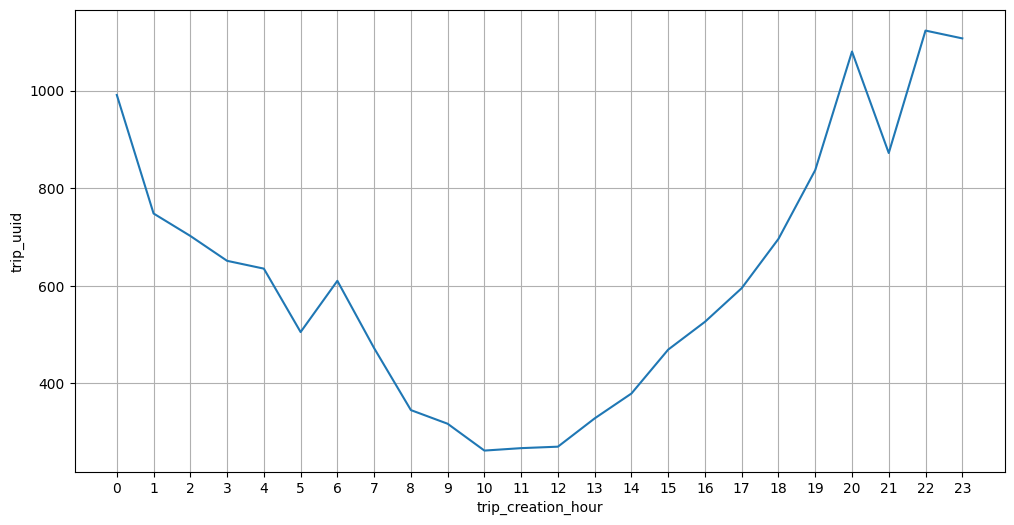

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x="trip_creation_hour",y="trip_uuid",data=df_hr)
plt.xticks(np.arange(0,24))
plt.grid("both")


 The above plot that the number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

In [ ]:
data["trip_creation_day"].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int8)

In [ ]:
df_day = data.groupby(["trip_creation_day"])["trip_uuid"].count().to_frame().reset_index()
df_day.head()

,trip_creation_day,trip_uuid
0,1,600
1,2,549
2,3,627
3,12,747
4,13,750


In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x="trip_creation_day",y="trip_uuid",data=df_day)
plt.xticks(np.arange(1,32))
plt.grid("both")
plt.plot()

[]

1. From the above plot that most of the trips are created in the mid of the month.
2. That means customers usually make more orders in the mid of the month.

lets look at the distribution of route types for orders

In [ ]:
df_route = data.groupby(["route_type"])["trip_uuid"].count().to_frame().reset_index()
df_route["perc"] = df_route["trip_uuid"]/df_route["trip_uuid"].sum()*100
df_route.head()

In [ ]:
plt.pie(x=df_route["perc"],labels=df_route["route_type"],autopct="%.2f%%")
plt.show()

# Lets check the number of trips created from different states.

In [ ]:
df_source_state = data.groupby(["source_state"])["trip_uuid"].count().to_frame().reset_index()
df_source_state["perc"] = round(df_source_state["trip_uuid"]/df_source_state["trip_uuid"].sum()*100,2)
df_source_state = df_source_state.sort_values(by="trip_uuid",ascending=False)
df_source_state.head()

In [ ]:
plt.figure(figsize = (10,15))
sns.barplot(x="trip_uuid",y="source_state",data=df_source_state)
plt.show()

It can be seen in the above plot that maximum trips originated from Maharashtra state followed by Karnataka and Haryana. That means that the seller base is strong in these states

Lets look which city create maximum trips.

In [ ]:
df_city = data.groupby(["source_city"])["trip_uuid"].count().to_frame().reset_index()
df_city["perc"] = round(df_city["trip_uuid"]/df_city["trip_uuid"].sum()*100,2)
df_city = df_city.sort_values(by = "trip_uuid",ascending=False)[:30]
df_city

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="trip_uuid",y="source_city",data=df_city)
plt.show()

Lets look at the state which is highest orders or the destinations.

In [ ]:
df_dest_state = data.groupby(["destination_state"])["trip_uuid"].count().to_frame().reset_index()
df_dest_state["perc"] = round(df_dest_state["trip_uuid"]/df_dest_state["trip_uuid"].sum()*100,2)
df_dest_state = df_dest_state.sort_values(by="trip_uuid",ascending=False)
df_dest_state.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="trip_uuid",y="destination_state",data=df_dest_state)
plt.show()

 The above plot that maximum trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high in these states.

In [ ]:
# Lets look at top destination cities .
df_dest_city = data.groupby(["destination_city"])["trip_uuid"].count().to_frame().reset_index()
df_dest_city["perc"] = round(df_dest_city["trip_uuid"]/df_dest_city["trip_uuid"].sum()*100,2)
df_dest_city = df_dest_city.sort_values(by="trip_uuid",ascending=False)[:30]
df_dest_city

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="trip_uuid",y="destination_city",data=df_dest_city)
plt.show()

[]

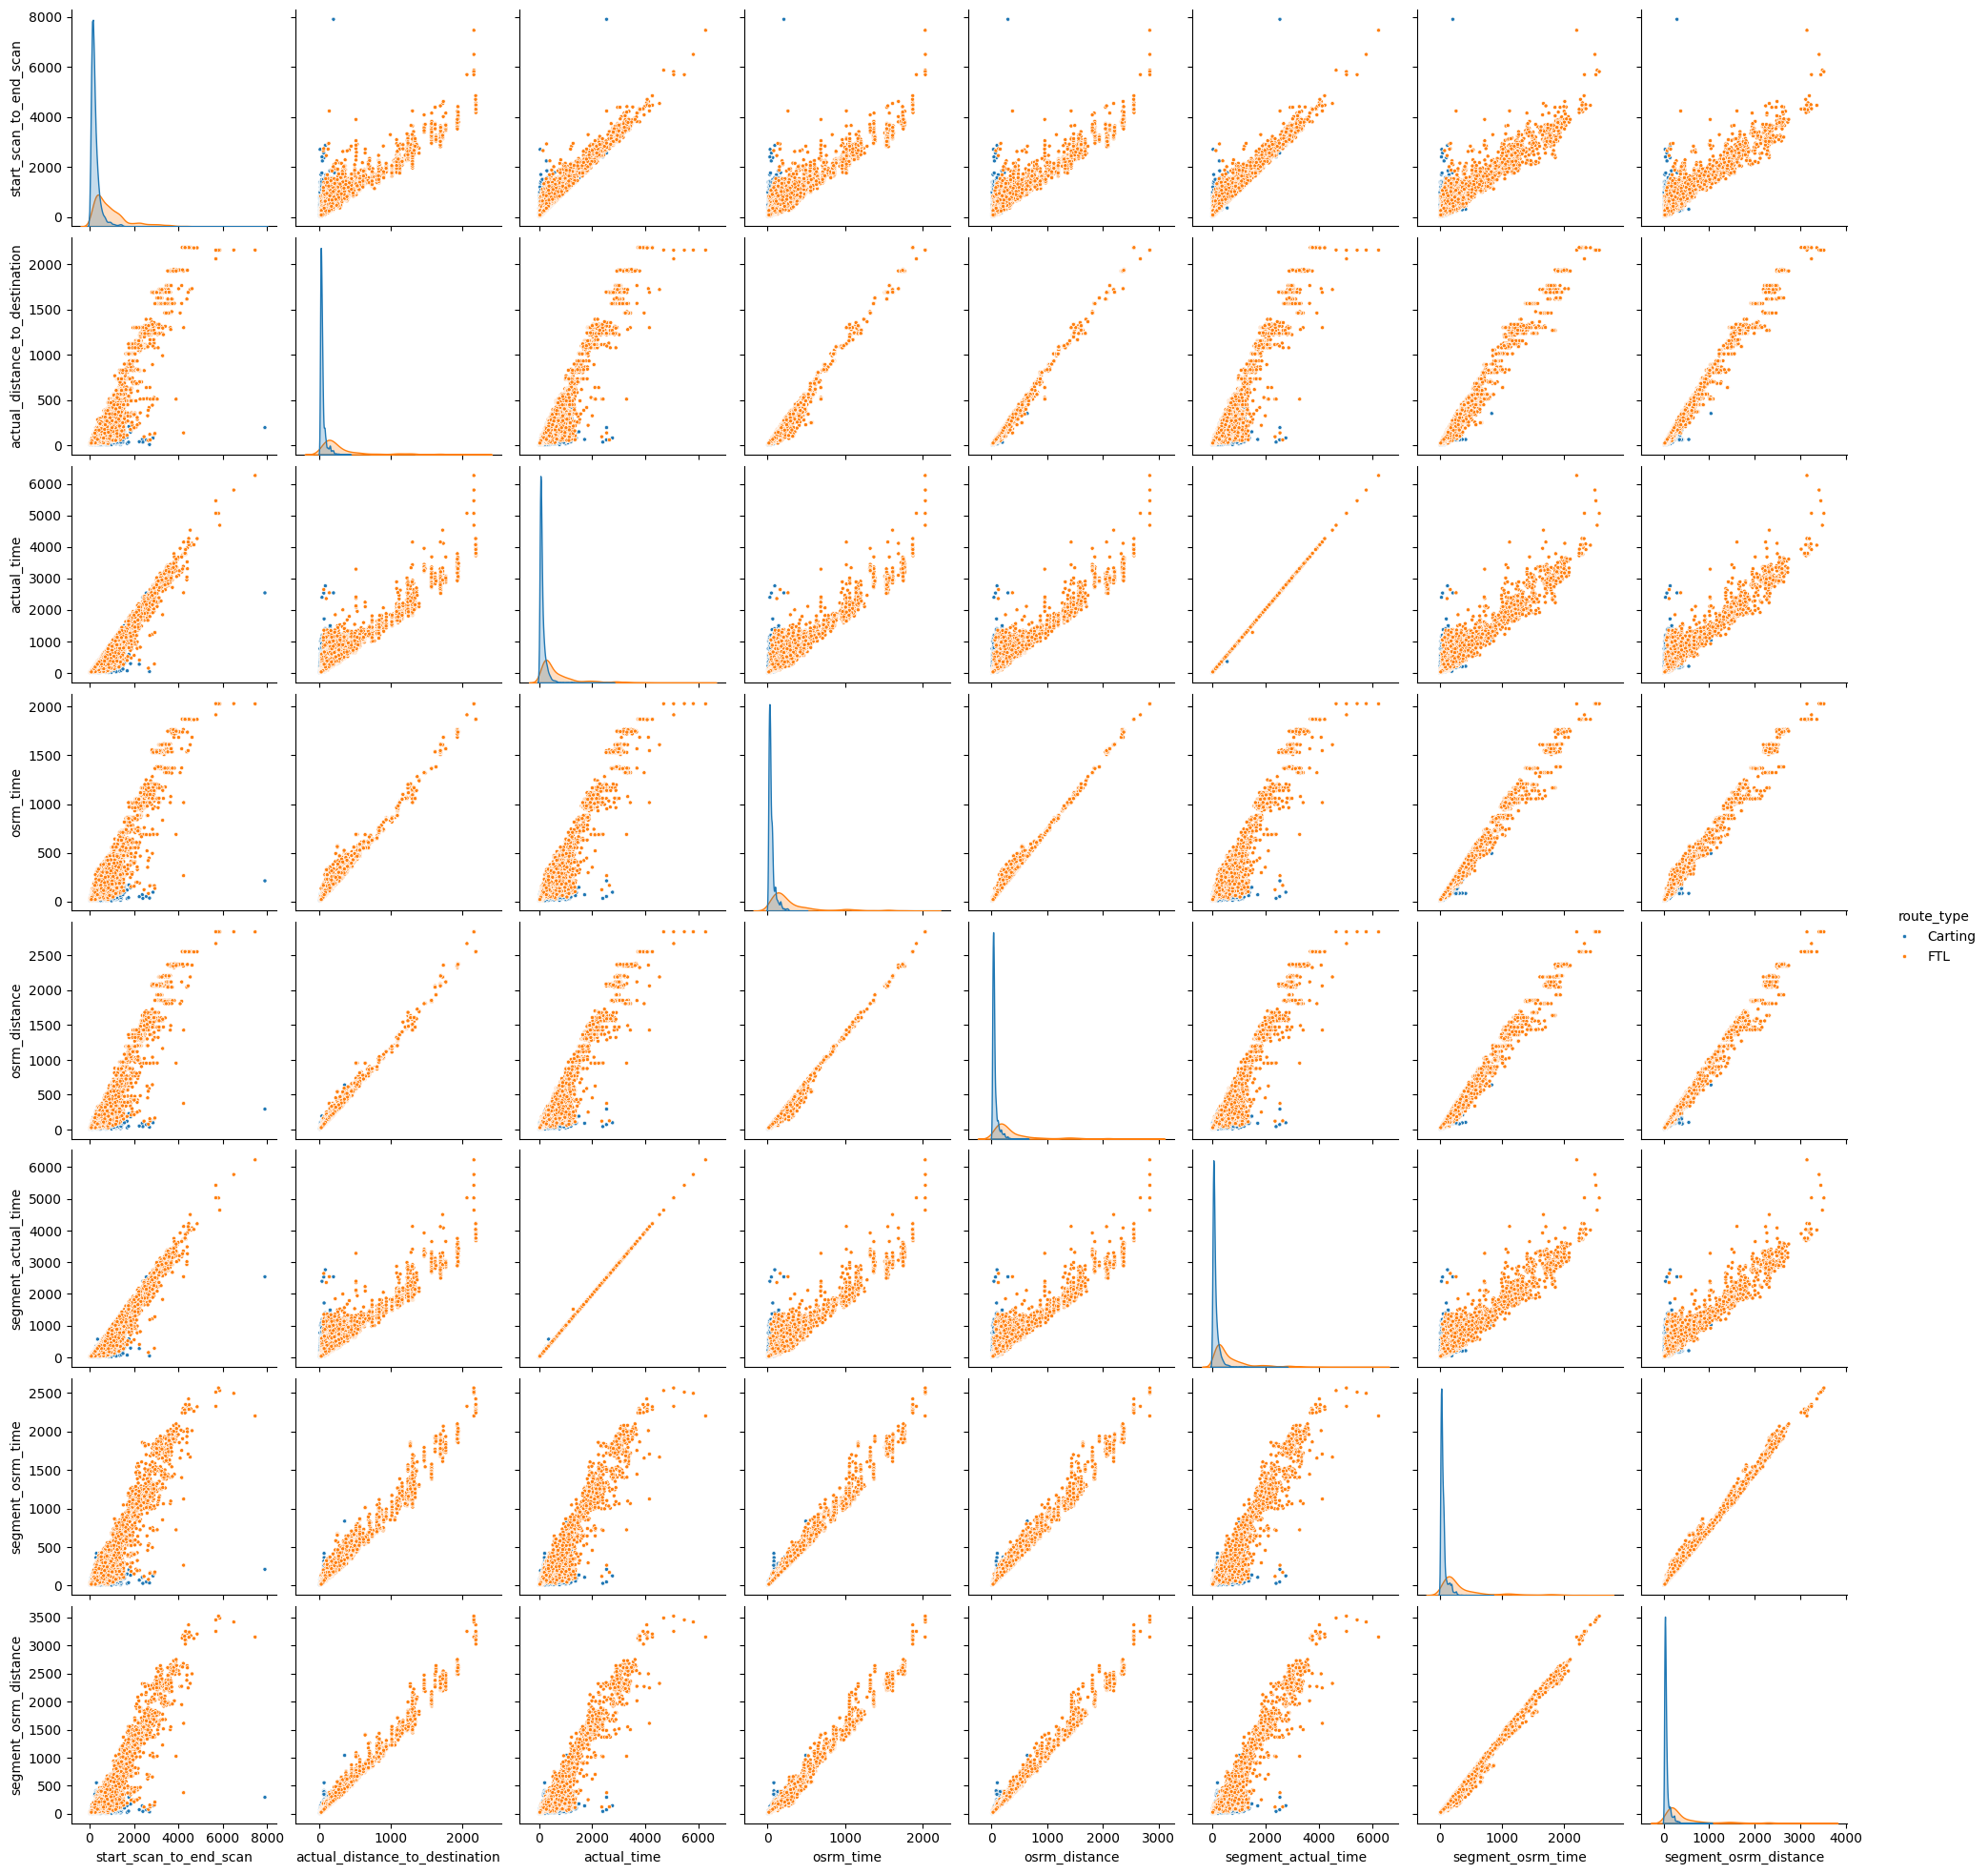

In [214]:
num_cols = [ 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(data= data,
             vars = num_cols,
             hue = "route_type",
             kind = "scatter",
             markers = ".")
plt.plot()

In [215]:
df_corr = data[num_cols].corr()
df_corr

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
start_scan_to_end_scan,1.000000,0.919478,0.961611,0.927330,0.925240,0.961591,0.919406,0.920170
actual_distance_to_destination,0.919478,1.000000,0.954232,0.993534,0.997275,0.953324,0.987721,0.993254
actual_time,0.961611,0.954232,1.000000,0.958769,0.959461,0.999978,0.954041,0.957150
osrm_time,0.927330,0.993534,0.958769,1.000000,0.997595,0.957964,0.993552,0.991826
osrm_distance,0.925240,0.997275,0.959461,0.997595,1.000000,0.958622,0.992143,0.994961
segment_actual_time,0.961591,0.953324,0.999978,0.957964,0.958622,1.000000,0.953229,0.956306
segment_osrm_time,0.919406,0.987721,0.954041,0.993552,0.992143,0.953229,1.000000,0.996098
segment_osrm_distance,0.920170,0.993254,0.957150,0.991826,0.994961,0.956306,0.996098,1.000000


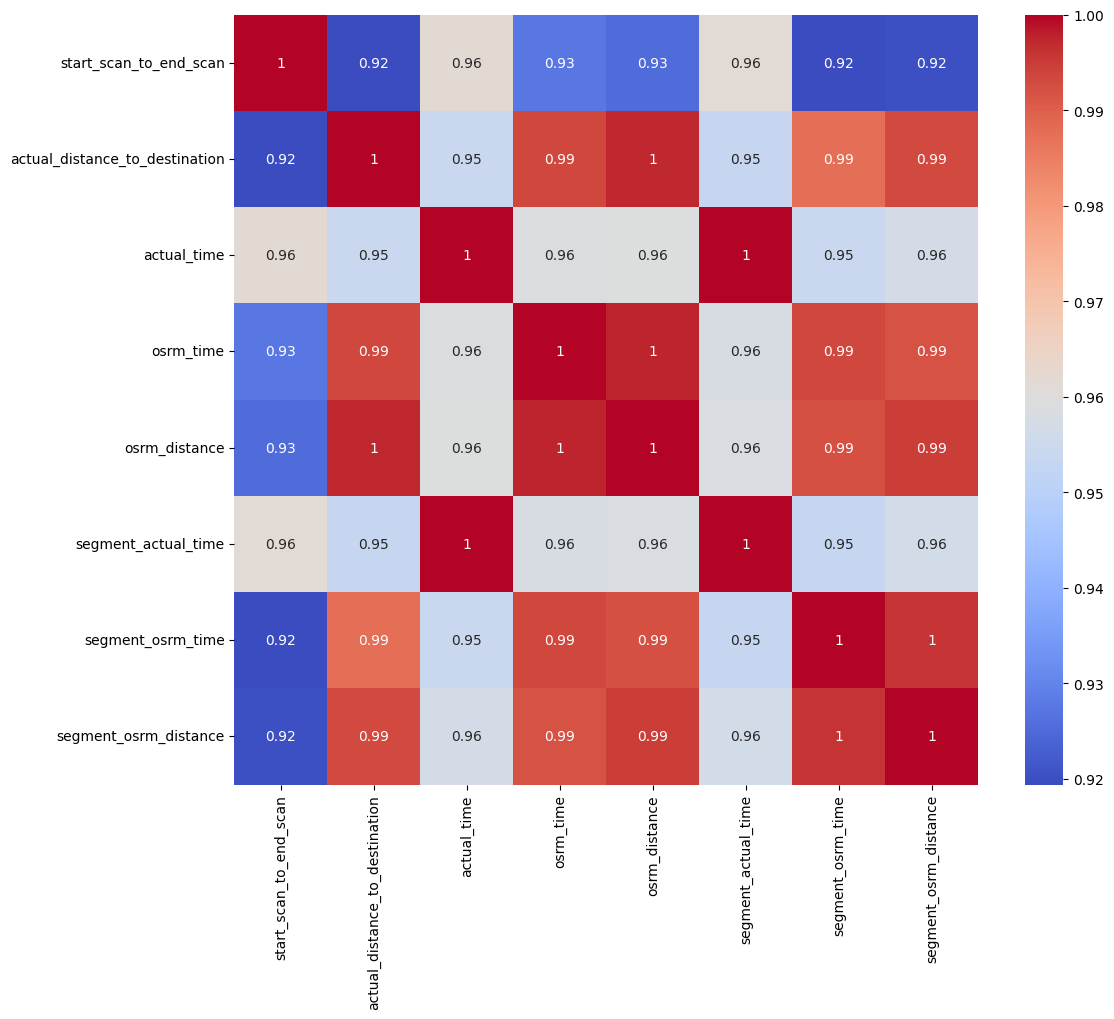

In [216]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot = True,cmap="coolwarm")
plt.show()

Very High Correlation (> 0.9) exists between columns all the numerical columns specified above

# In-depth analysis and feature engineering

Calculating the time taken between od_start_time and od_end_time and keep it as a feature

In [217]:
# Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check


Step - 1 Setting up null Hypothesis

In [218]:
h0 =  "od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same." # null hypothesis
h1 =  "od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different." # alternate hypothesis

Step - 2 Checking for basic assumption for hypothesis.
1. Distribution checking using QQ-plot.
2. Homogeneity of variances using  Lavene's test.

Step - 3 Defining what test to under take.

Step - 4 Setting up alpha 0.05

Step - 5 Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

# 1. Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [219]:

data["od_total_time"] = data["od_end_time"] - data["od_start_time"]
data.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
data["od_total_time"] = data["od_total_time"].apply(lambda x: round(x.total_seconds()/60,2))
data["od_total_time"].head()

,od_total_time
0,0.00
1,100.49
2,0.00
3,98.01
4,176.45


In [220]:
data[["od_total_time","start_scan_to_end_scan"]].describe()

,od_total_time,start_scan_to_end_scan
count,14787.000000,14787.000000
mean,369.725537,529.442754
std,576.299504,658.286556
min,-1690.470000,23.000000
25%,95.110000,149.000000
50%,196.020000,279.000000
75%,402.680000,632.000000
max,7898.550000,7898.000000


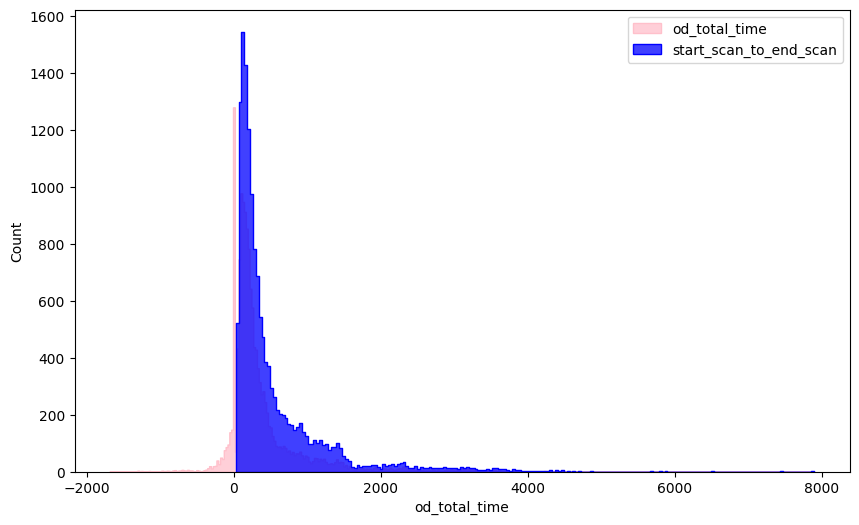

In [221]:
# visual test to check wether data follows normal distribution or not
plt.figure(figsize=(10,6))
sns.histplot(data["od_total_time"],element="step",color="pink")
sns.histplot(data["start_scan_to_end_scan"],element="step",color="blue")
plt.legend(["od_total_time","start_scan_to_end_scan"])
plt.show()


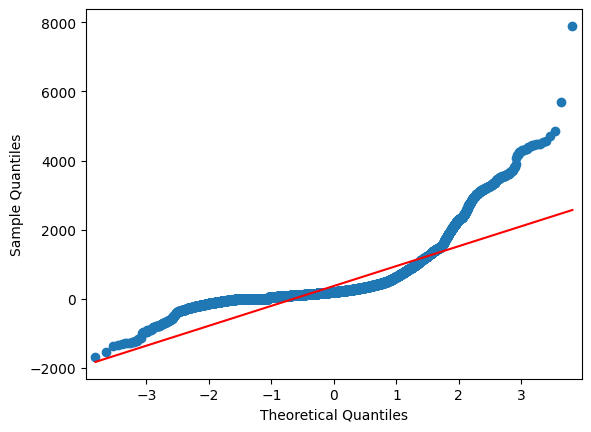

In [222]:
qqplot(data["od_total_time"],line="s")
plt.show()

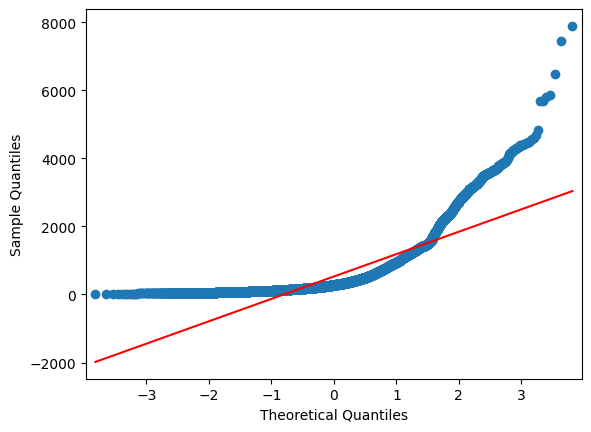

In [223]:
qqplot(data["start_scan_to_end_scan"],line="s")
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution.

In [224]:
# lets check with Shapiro test
h0 = "sample is normally distributed"
h1 = "sample is not normally distributed"
alpha = 0.05
t_stats,p_val = shapiro(data["od_total_time"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  0.6578679684942486
p_val:  4.4135514666517665e-61
reject null hypothesis sample is not normally distributed


In [225]:
# lets check for variance using levene's test
h0 = "variance of samples are equal"
h1 = "variance of samples are not equal"
alpha = 0.05
t_stats,p_val = levene(data["od_total_time"].sample(3000),data["start_scan_to_end_scan"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  14.400618172331965
p_val:  0.00014920926754635245
reject null hypothesis variance of samples are not equal


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test

In [226]:
# as the data doesnt follow normal distribution or equal variance lets do the "Kruskal test"
Ho = "od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different"
h1 = "od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same."
alpha = 0.05
t_stats,p_val = kruskal(data["od_total_time"],data["start_scan_to_end_scan"])
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  1103.8562234196543
p_val:  4.794661332923027e-242
reject null hypothesis od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.


# Since p-value > alpha therfore it can be concluded that od_total_time and start_scan_to_end_scan are similar.

# 2. Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [227]:
data[["actual_time","osrm_time"]].describe()

,actual_time,osrm_time
count,14787.000000,14787.000000
mean,356.316224,161.667072
std,561.528033,272.406218
min,9.000000,6.000000
25%,67.000000,29.000000
50%,148.000000,60.000000
75%,367.000000,168.000000
max,6265.000000,2032.000000


<Axes: xlabel='actual_time', ylabel='Count'>

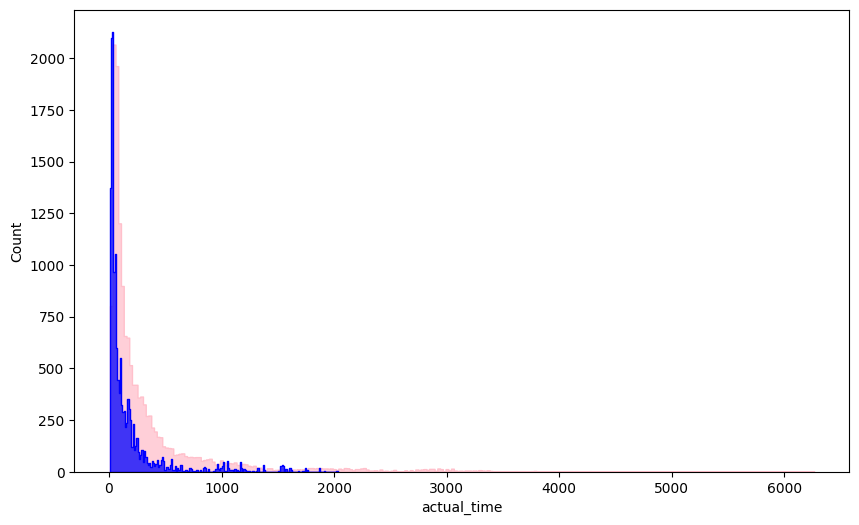

In [228]:
# Visual Tests to know if the samples follow normal distribution
plt.figure(figsize=(10,6))
sns.histplot(data["actual_time"],element="step",color="pink")
sns.histplot(data["osrm_time"],element="step",color="blue")

In [229]:
#Distribution check using QQ Plot

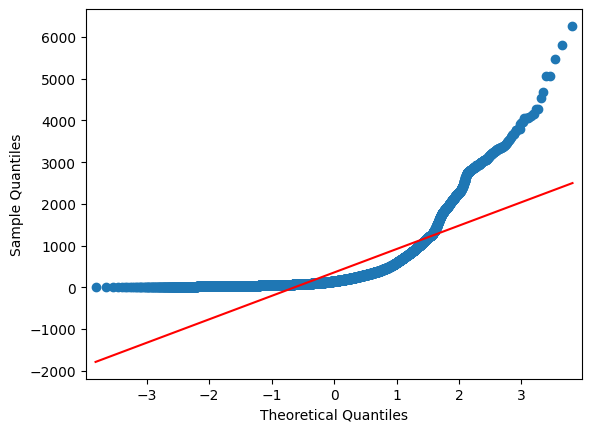

In [230]:
qqplot(data["actual_time"],line="s")
plt.show()

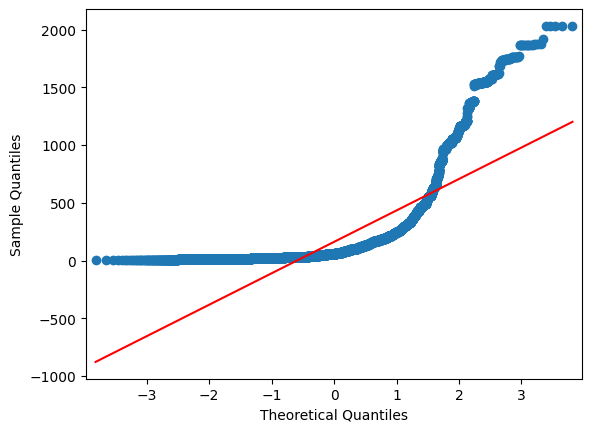

In [231]:
qqplot(data["osrm_time"],line="s")
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution.

In [232]:
# # lets check with Shapiro test
h0 = "sample is normally distributed"
h1 = "sample is not normally distributed"
alpha = 0.05
t_stats,p_val = shapiro(data["actual_time"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  0.5825506170185065
p_val:  8.070533679552435e-65
reject null hypothesis sample is not normally distributed


In [233]:
# lets check for variance using levene's test
h0 = "variance of samples are equal"
h1 = "variance of samples are not equal"
alpha = 0.05
t_stats,p_val = levene(data["actual_time"].sample(3000),data["osrm_time"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  223.2052710007823
p_val:  1.3971353508393735e-49
reject null hypothesis variance of samples are not equal


In [234]:
# as the data doesnt follow normal distribution or equal variance lets do the "Kruskal test"
h0 = "actual_time (Total Trip Time) and osrm_time (Expected total trip time) are different"
h1 = "actual_time (Total Trip Time) and osrm_time (Expected total trip time) are same."
alpha = 0.05
t_stats,p_val = kruskal(data["actual_time"],data["osrm_time"])
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)


t_stats:  3366.0059884512575
p_val:  0.0
reject null hypothesis actual_time (Total Trip Time) and osrm_time (Expected total trip time) are same.


Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar.

# 3. Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [235]:
data[["actual_time","segment_actual_time"]].describe()

,actual_time,segment_actual_time
count,14787.000000,14787.000000
mean,356.316224,353.118618
std,561.528033,556.439155
min,9.000000,9.000000
25%,67.000000,66.000000
50%,148.000000,147.000000
75%,367.000000,364.000000
max,6265.000000,6230.000000


[]

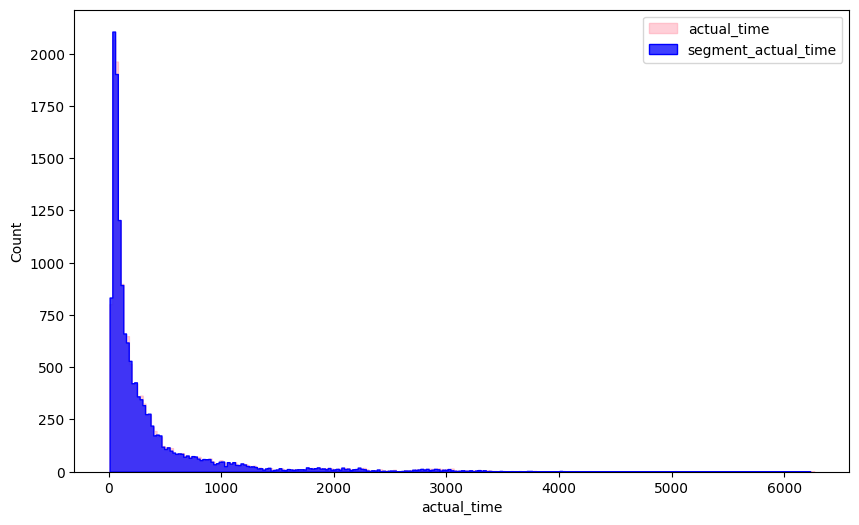

In [236]:
plt.figure(figsize=(10,6))
sns.histplot(data["actual_time"],element="step",color="pink")
sns.histplot(data["segment_actual_time"],element="step",color="blue")
plt.legend(["actual_time","segment_actual_time"])
plt.plot()

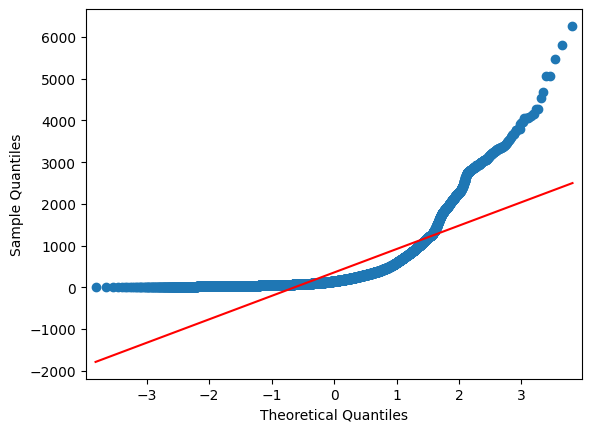

In [237]:
# Distribution check using QQ Plot
qqplot(data["actual_time"],line="s")
plt.show()

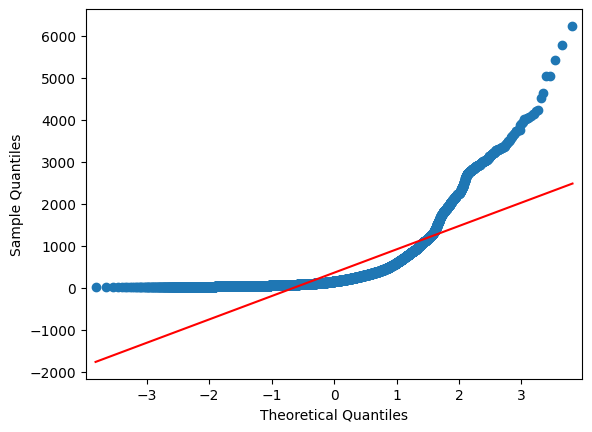

In [238]:
qqplot(data["segment_actual_time"],line="s")
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution.

In [239]:
# lets check with Shapiro test
h0 = "sample is normally distributed"
h1 = "sample is not normally distributed"
alpha = 0.05
t_stats,p_val = shapiro(data["actual_time"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  0.5977675540150283
p_val:  4.103586578300747e-64
reject null hypothesis sample is not normally distributed


In [240]:
# # lets check for variance using levene's test
h0 = "variance of samples are equal"
ha = "variance of samples are not equal"
alpha = 0.05
t_stats,p_val = levene(data["actual_time"].sample(3000),data["segment_actual_time"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",ha)
else:
  print("accept null hypothesis",h0)

t_stats:  0.10769681951002091
p_val:  0.7427931209120289
accept null hypothesis variance of samples are equal


In [241]:
# lets do ttest
h0 = "actual_time  and segment_actual_time are same"
h1 = "actual_time  and segment_actual_time are different"
alpha = 0.05
t_stats,p_val = ttest_ind(data["actual_time"],data["segment_actual_time"])
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  0.4918655757089749
p_val:  0.6228180262286567
accept null hypothesis actual_time  and segment_actual_time are same


In [242]:
# lets do kruskal test
h0 = "actual_time  and segment_actual_time are same"
h1 = "actual_time  and segment_actual_time are different"
alpha = 0.05
t_stats,p_val = kruskal(data["actual_time"],data["segment_actual_time"])
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  0.6471021299274822
p_val:  0.4211506529861392
accept null hypothesis actual_time  and segment_actual_time are same


Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar.

# 4. Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [243]:
data[["osrm_distance","segment_osrm_distance"]].describe()

,osrm_distance,segment_osrm_distance
count,14787.000000,14787.00000
mean,204.631953,222.66823
std,370.953239,416.76499
min,9.072900,9.07290
25%,30.875600,32.57885
50%,65.575600,69.78420
75%,207.087600,216.46395
max,2840.081000,3523.63240


Visual Tests to know if the samples follow normal distribution

[]

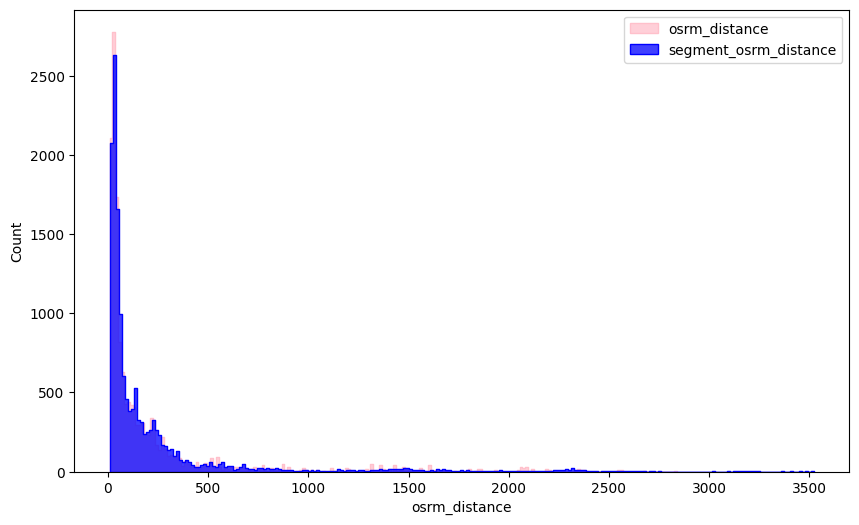

In [244]:
plt.figure(figsize=(10,6))
sns.histplot(data["osrm_distance"],element="step",color="pink")
sns.histplot(data["segment_osrm_distance"],element="step",color="blue")
plt.legend(["osrm_distance","segment_osrm_distance"])
plt.plot()

Distribution check using QQ Plot

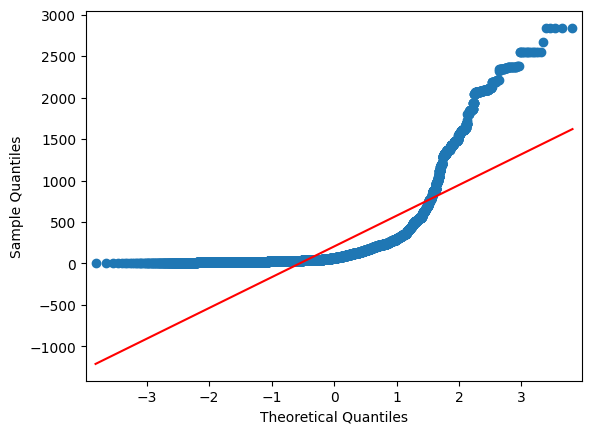

In [245]:
qqplot(data["osrm_distance"],line="s")
plt.show()

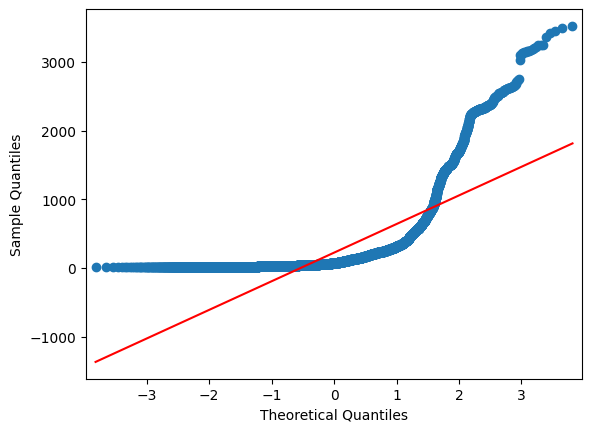

In [246]:
qqplot(data["segment_osrm_distance"],line="s")
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution.

In [247]:
# lets check with Shapiro test
h0 = "sample is normally distributed"
h1 = "sample is not normally distributed"
alpha = 0.05
t_stats,p_val = shapiro(data["osrm_distance"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  0.5063093020832232
p_val:  4.644052750033835e-68
reject null hypothesis sample is not normally distributed


The sample does not follow normal distribution

In [248]:
# # lets check for variance using levene's test
h0 = "variance of samples are not equal"
ha = "variance of samples are equal"
alpha = 0.05
t_stats,p_val = levene(data["osrm_distance"].sample(3000),data["segment_osrm_distance"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",ha)
else:
  print("accept null hypothesis",h0)

t_stats:  6.488795399449954
p_val:  0.010880399307548739
reject null hypothesis variance of samples are equal


In [249]:
# as the data doesnt follow normal distribution or equal variance lets do the "Kruskal test"
h0 = "osrm_distance  and segment_osrm_distance are same"
h1 = "osrm_distance  and segment_osrm_distance are different"
alpha = 0.05
t_stats,p_val = kruskal(data["osrm_distance"],data["segment_osrm_distance"])
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  19.08461632749707
p_val:  1.2504880921869609e-05
reject null hypothesis osrm_distance  and segment_osrm_distance are different


Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are not similar.

# 5. Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [250]:
data[["osrm_time","segment_osrm_time"]].describe()

,osrm_time,segment_osrm_time
count,14787.000000,14787.000000
mean,161.667072,180.482924
std,272.406218,314.622727
min,6.000000,6.000000
25%,29.000000,30.000000
50%,60.000000,65.000000
75%,168.000000,184.000000
max,2032.000000,2564.000000


Visual Tests to know if the samples follow normal distribution

[]

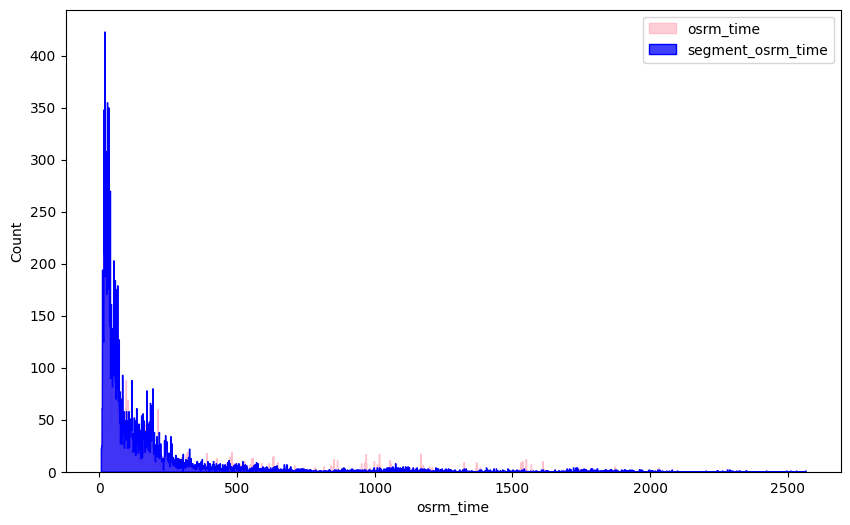

In [251]:
plt.figure(figsize=(10,6))
sns.histplot(data["osrm_time"],element="step",color="pink", bins=2000)
sns.histplot(data["segment_osrm_time"],element="step",color="blue", bins = 2000)
plt.legend(["osrm_time","segment_osrm_time"])
plt.plot()

Distribution check using QQ Plot

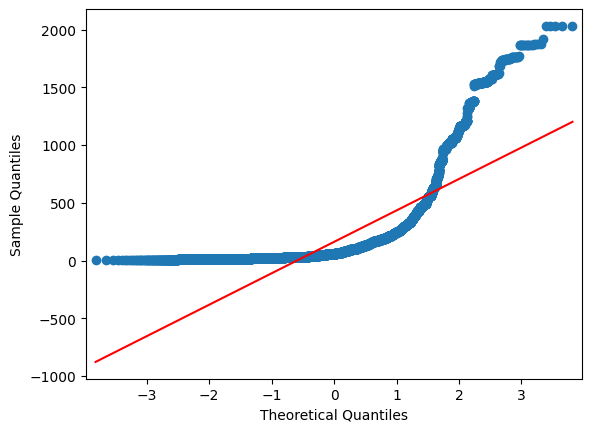

In [252]:
qqplot(data["osrm_time"],line="s")
plt.show()

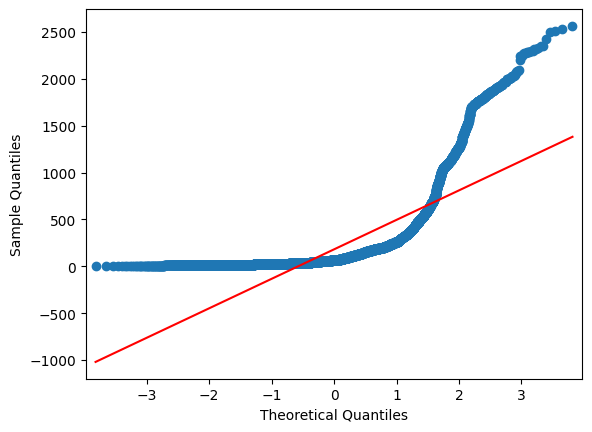

In [253]:
qqplot(data["segment_osrm_time"],line="s")
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution.

In [254]:
# lets check with Shapiro test
h0 = "sample is normally distributed"
h1 = "sample is not normally distributed"
alpha = 0.05
t_stats,p_val = shapiro(data["osrm_time"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  0.553776455923433
p_val:  4.257367431365948e-66
reject null hypothesis sample is not normally distributed


The sample does not follow normal distribution

In [255]:
# # lets check for variance using levene's test
h0 = "variance of samples are equal"
ha = "variance of samples are not equal"
alpha = 0.05
t_stats,p_val = levene(data["osrm_time"].sample(3000),data["segment_osrm_time"].sample(3000))
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",ha)
else:
  print("accept null hypothesis",h0)

t_stats:  5.546541738144537
p_val:  0.018549271200278782
reject null hypothesis variance of samples are not equal


In [256]:
# as the data doesnt follow normal distribution or equal variance lets do the "Kruskal test"
h0 = "osrm_time  and segment_osrm_time are same"
h1 = "osrm_time  and segment_osrm_time are different"
alpha = 0.05
t_stats,p_val = kruskal(data["osrm_time"],data["segment_osrm_time"])
print("t_stats: ",t_stats)
print("p_val: ",p_val)
if p_val < alpha:
  print("reject null hypothesis",h1)
else:
  print("accept null hypothesis",h0)

t_stats:  26.680958421616847
p_val:  2.3997479191438177e-07
reject null hypothesis osrm_time  and segment_osrm_time are different


Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are not similar.

# 6. Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [257]:
numeric_columns = data.select_dtypes(include=np.number).columns
numeric_columns.value_counts()

,count
cutoff_factor,1
actual_distance_to_destination,1
osrm_distance,1
start_scan_to_end_scan,1
segment_actual_time,1
segment_osrm_time,1
actual_time,1
osrm_time,1
segment_osrm_distance,1
trip_creation_year,1


In [258]:
num_col = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,369.725537,576.299504,-1690.470000,95.110000,196.020000,402.680000,7898.550000
start_scan_to_end_scan,14787.0,529.442754,658.286556,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.290730,305.678137,9.002461,22.840056,48.376934,163.685113,2187.483994
actual_time,14787.0,356.316224,561.528033,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,161.667072,272.406218,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,204.631953,370.953239,9.072900,30.875600,65.575600,207.087600,2840.081000
segment_actual_time,14787.0,353.118618,556.439155,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.482924,314.622727,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.668230,416.764990,9.072900,32.578850,69.784200,216.463950,3523.632400


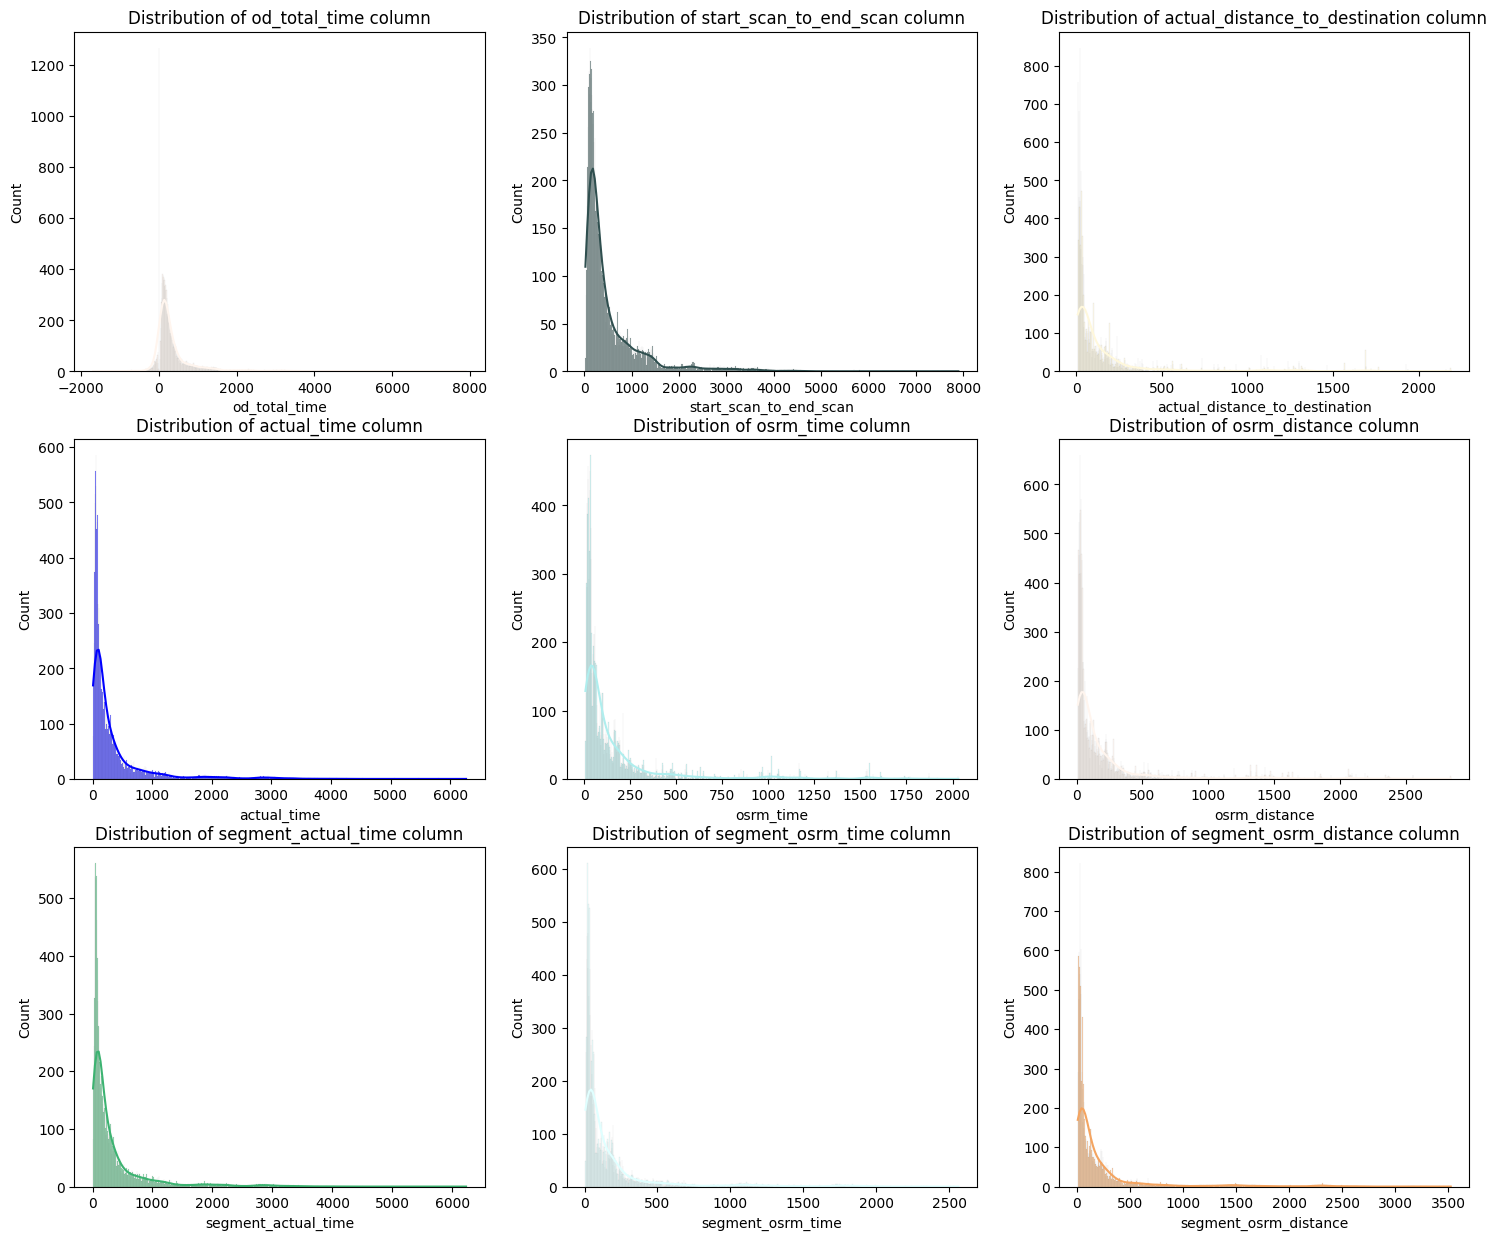

In [259]:
import matplotlib.colors as mcolors

plt.figure(figsize = (18, 15))
for i in range(len(num_col)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mcolors.cnames.keys()))
    sns.histplot(data[num_col[i]], bins = 1000, kde = True, color = clr)
    plt.title(f"Distribution of {num_col[i]} column")
    plt.plot()

It can be inferred from the above plots that data in all the numerical columns are right skewed.

In [ ]:
plt.figure(figsize = (18, 15))
for i in range(len(num_col)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mcolors.cnames.keys()))
    sns.boxplot(data[num_col[i]], color = clr)
    plt.title(f"Distribution of {num_col[i]} column")
    plt.plot()

It can be clearly seen in the above plots that there are outliers in all the numerical columns that need to be treated.

# 7. Handle the outliers using the IQR method.

In [ ]:
# Handling Outliers
da = data.copy()
for i in num_col:
  q1 = da[i].quantile(0.25)
  q3 = da[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  outliers = data.loc[(data[i] < lower_bound) | (data[i] > upper_bound)]
  print("column:",i)
  print(f'q1: {q1}')
  print(f'q3: {q3}')
  print(f'iqr: {iqr}')
  print(f'lower_bound: {lower_bound}')
  print(f'upper_bound: {upper_bound}')
  print(f'number of outliers: {outliers.shape[0]}')
  print("------------------------")




The outliers present in our sample data can be the true outliers. It's best to remove outliers only when there is a sound reason for doing so. Some outliers represent natural variations in the population, and they should be left as is in the dataset.

In [262]:
da

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,cutoff_factor,actual_distance_to_destination,osrm_distance,...,segment_osrm_distance,source_state,destination_state,source_city,destination_city,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,od_total_time
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),72,73.186911,85.1110,...,84.1894,Karnataka,Karnataka,Doddablpur,Doddablpur,2018,9,12,0,0.00
1,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),17,17.175274,19.6800,...,19.8766,Maharashtra,Maharashtra,Mumbai Hub,Mumbai,2018,9,12,0,100.49
2,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),24,24.597048,28.0647,...,28.0647,Tamil Nadu,Tamil Nadu,Chennai,Chennai,2018,9,12,0,0.00
3,Carting,trip-153671066201138152,2018-09-12 00:04:22.011653,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),9,9.100510,12.0184,...,12.0184,Tamil Nadu,Tamil Nadu,Chennai,Chennai,2018,9,12,0,98.01
4,Carting,trip-153671066826362165,2018-09-12 00:04:28.263977,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),22,22.424210,28.9203,...,28.9203,Karnataka,Karnataka,HBR Layout PC,HBR Layout PC,2018,9,12,0,176.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,FTL,trip-153861004148234782,2018-10-03 23:40:41.482736,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),167,168.396341,207.4975,...,209.4499,Jharkhand,Jharkhand,Dumka,Jamtara,2018,10,3,23,-117.66
14783,FTL,trip-153861007249500192,2018-10-03 23:41:12.495257,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),192,194.552260,229.2052,...,232.5811,Bihar,Bihar,Muzaffrpur,Muzaffrpur,2018,10,3,23,1019.49
14784,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),835,836.072017,997.7577,...,1166.3614,Uttar Pradesh,Uttar Pradesh,Etawah,Kanpur,2018,10,3,23,-407.27
14785,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),84,84.743813,102.3828,...,107.6915,Gujarat,Gujarat,Kadi,Kadi,2018,10,3,23,0.00


#8. Do one-hot encoding of categorical variables (like route_type)

In [263]:
# Get value counts before one-hot encoding

data['route_type'].value_counts()

,count
route_type,
Carting,8906
FTL,5881


In [264]:
# Perform one-hot encoding on categorical column route type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['route_type'] = label_encoder.fit_transform(data['route_type'])
data["route_type"].value_counts()

,count
route_type,
0,8906
1,5881


# 9. Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [265]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [266]:
min_max = MinMaxScaler()
min_max = min_max.fit_transform(data[["od_total_time"]])
data["od_total_time"].min(),data["od_total_time"].max()

(-1690.47, 7898.55)

[]

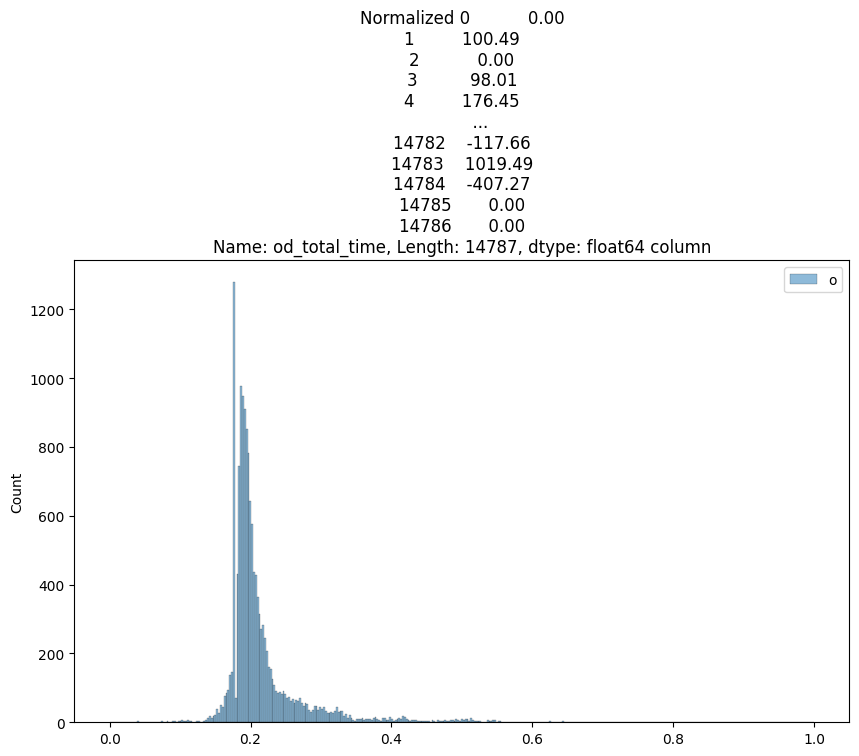

In [267]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

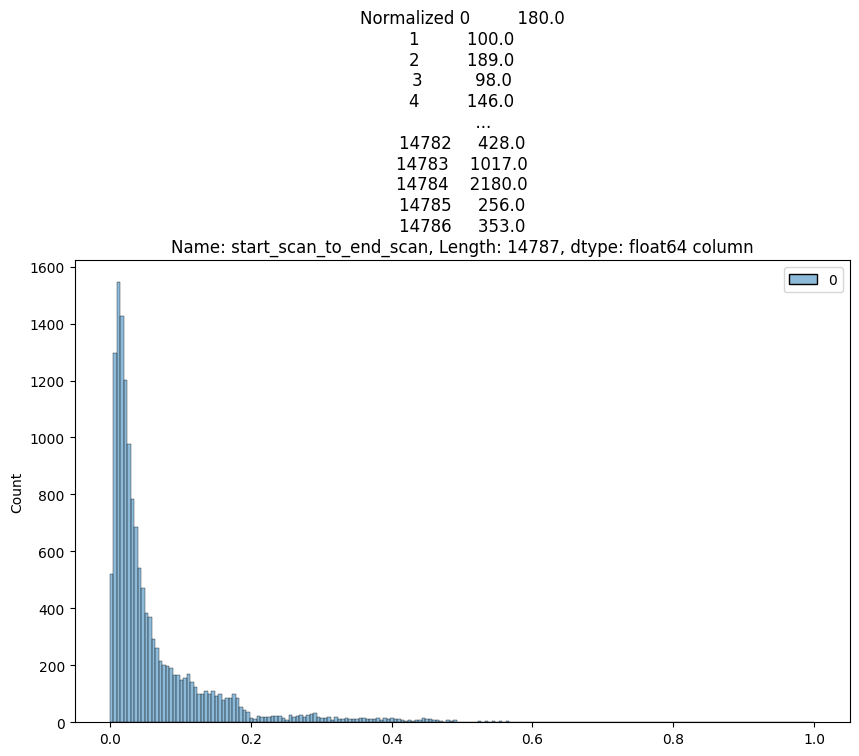

In [268]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data['start_scan_to_end_scan']} column")
plt.plot()

[]

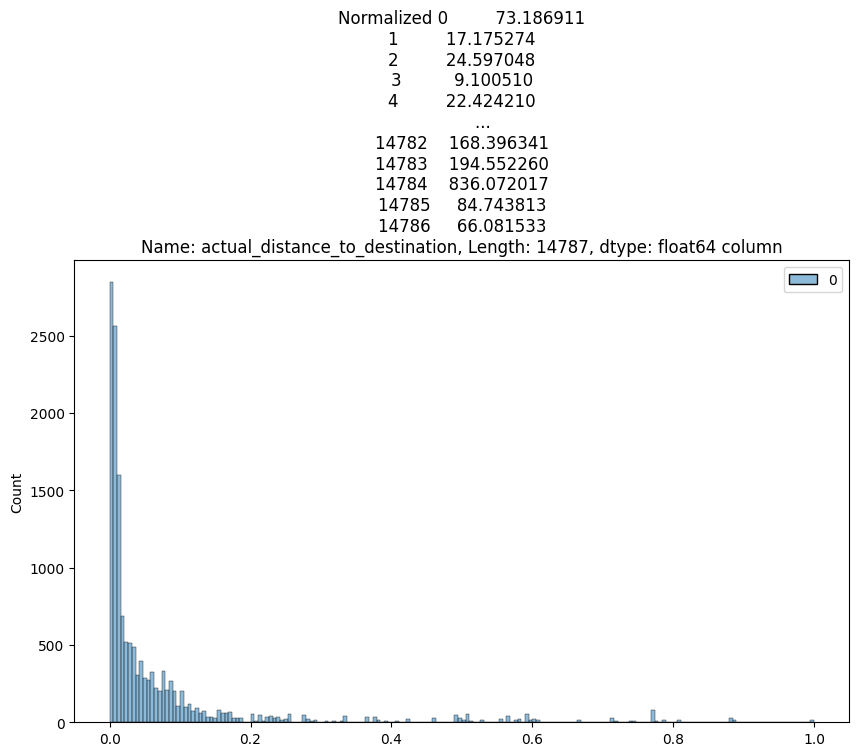

In [269]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data['actual_distance_to_destination']} column")
plt.plot()

[]

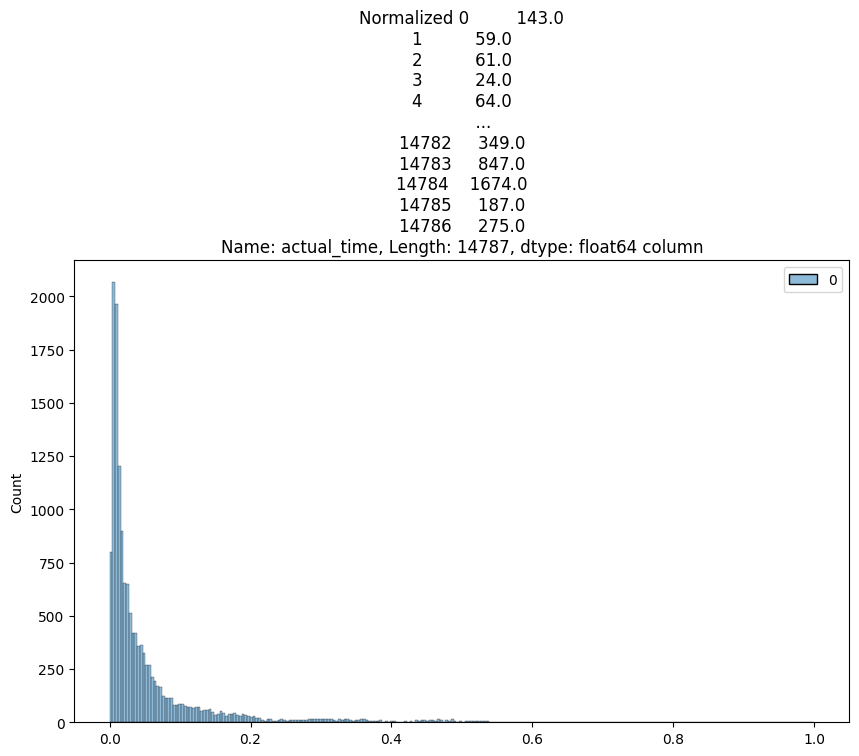

In [270]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data['actual_time']} column")
plt.plot()

[]

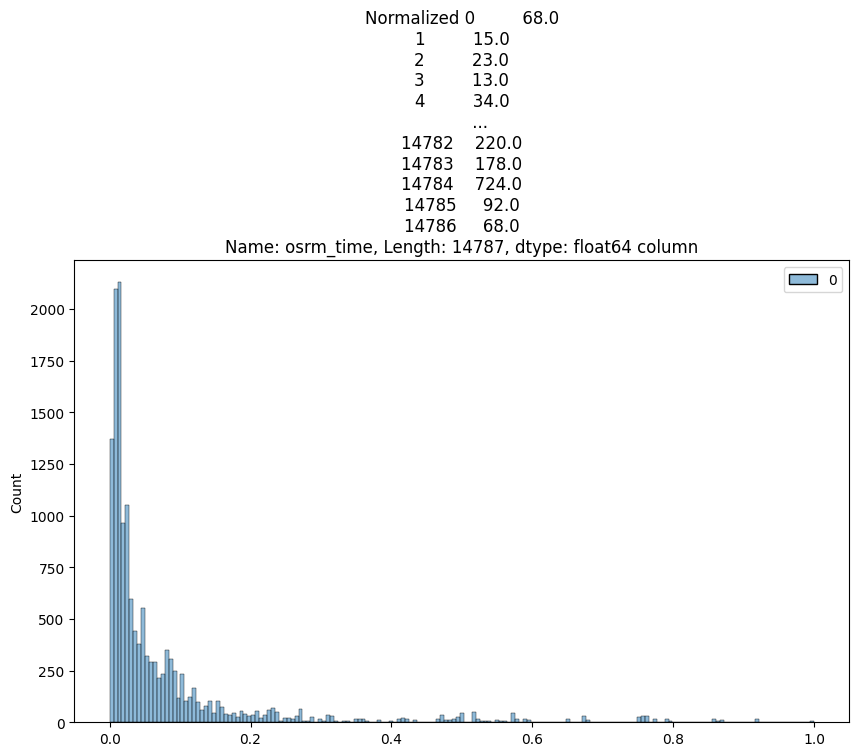

In [271]:
plt.figure(figsize=(10,6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data["osrm_time"].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data['osrm_time']} column")
plt.plot()

[]

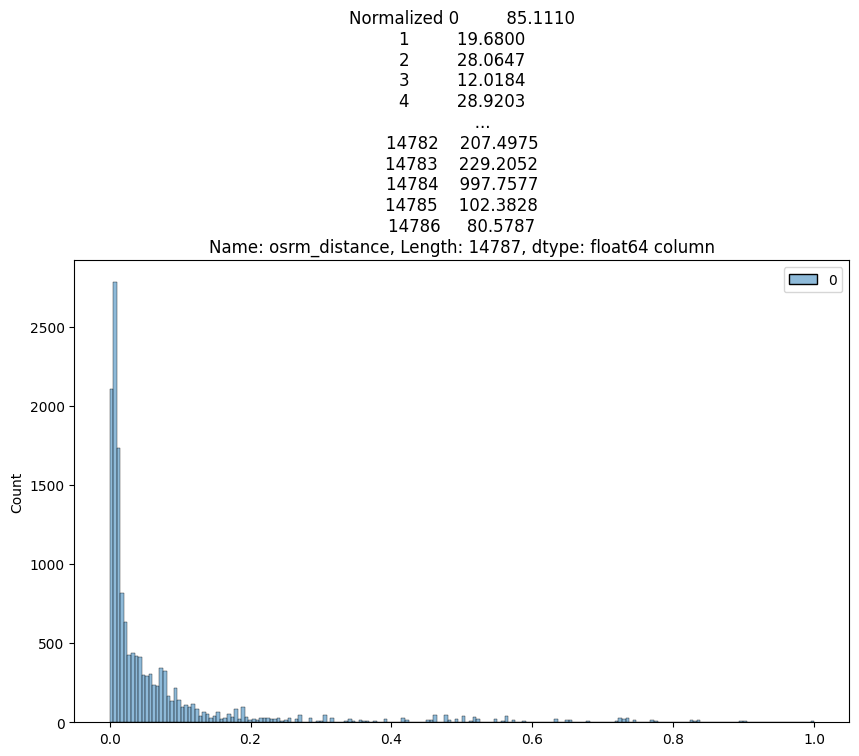

In [272]:
plt.figure(figsize=(10,6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data["osrm_distance"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['osrm_distance']} column")
plt.plot()

[]

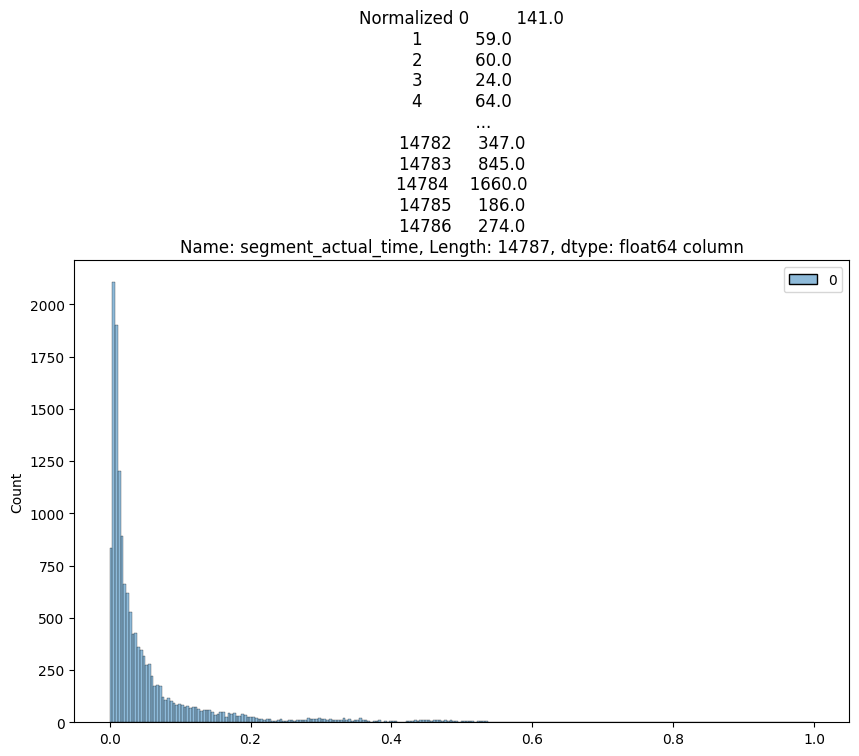

In [273]:
plt.figure(figsize=(10,6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data["segment_actual_time"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['segment_actual_time']} column")
plt.plot()

[]

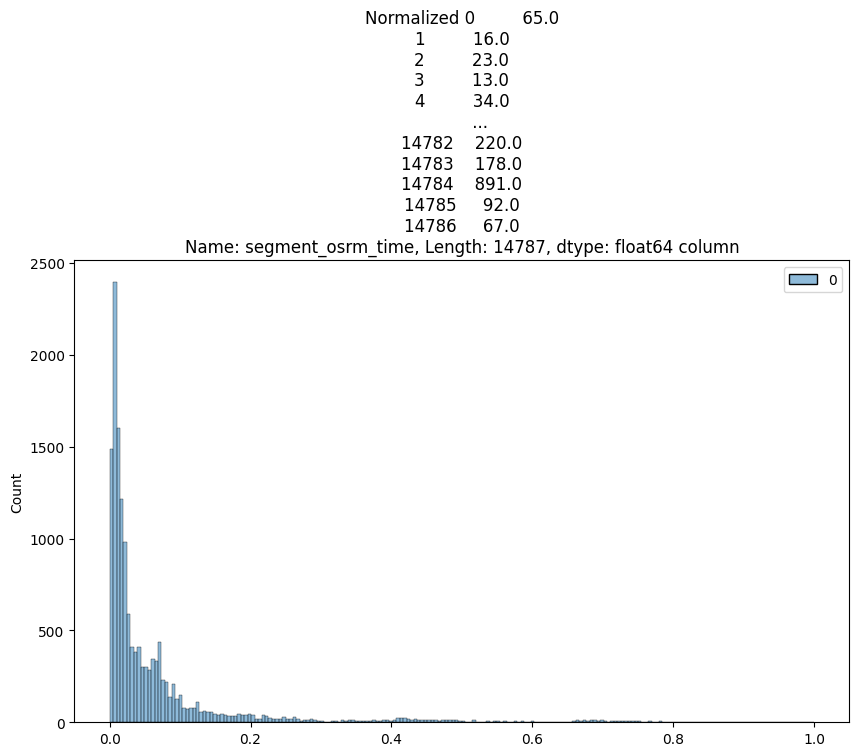

In [274]:
plt.figure(figsize=(10,6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data["segment_osrm_time"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['segment_osrm_time']} column")
plt.plot()

In [ ]:
plt.figure(figsize=(10,6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data["segment_osrm_distance"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['segment_osrm_distance']} column")
plt.plot()

# Standardization of column

[]

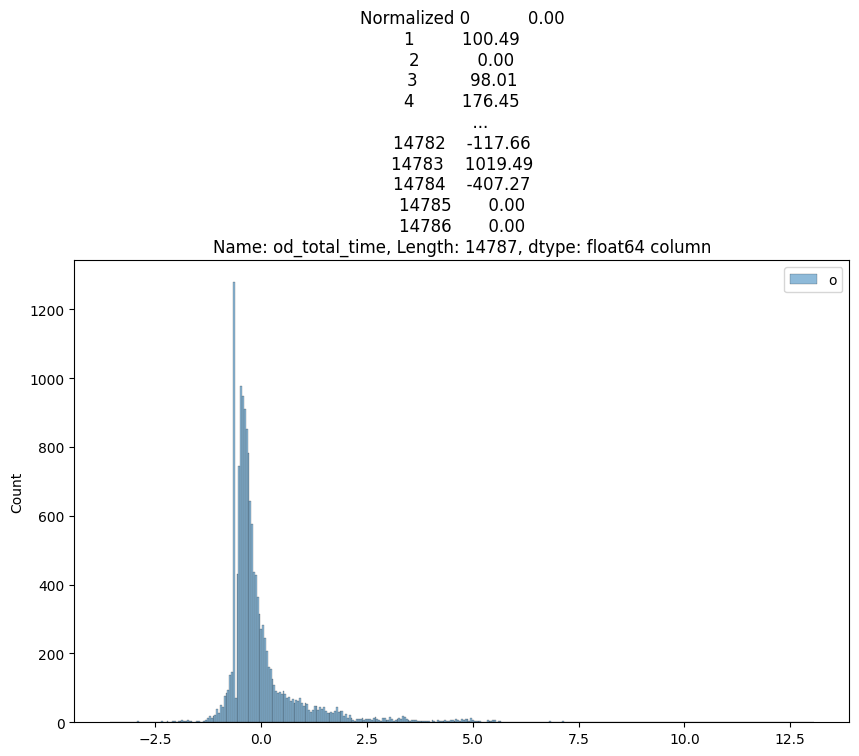

In [276]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data['od_total_time']} column")
plt.legend("od_total_time")
plt.plot()

[]

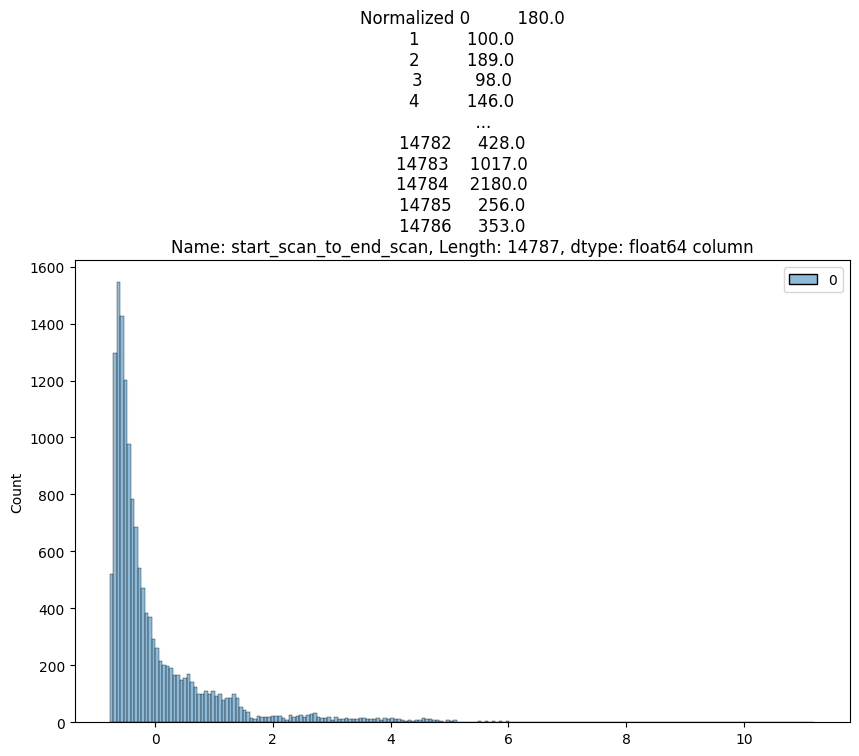

In [277]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data['start_scan_to_end_scan']} column")
plt.plot()

[]

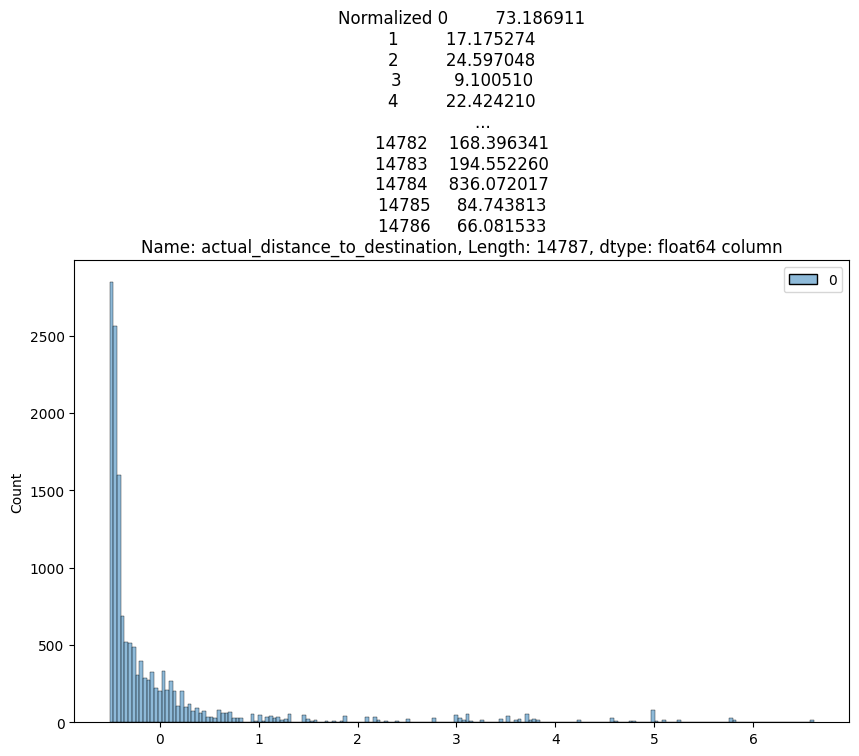

In [278]:
plt.figure(figsize=(10,6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data["actual_distance_to_destination"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['actual_distance_to_destination']} column")
plt.plot()

Text(0.5, 1.0, 'Normalized 0         143.0\n1          59.0\n2          61.0\n3          24.0\n4          64.0\n          ...  \n14782     349.0\n14783     847.0\n14784    1674.0\n14785     187.0\n14786     275.0\nName: actual_time, Length: 14787, dtype: float64 column')

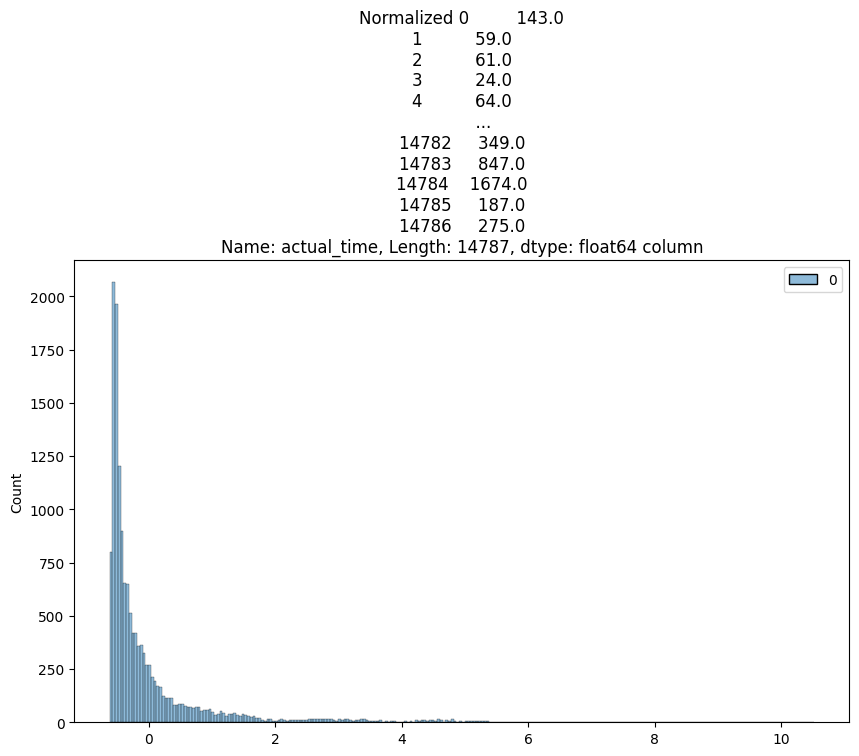

In [279]:
plt.figure(figsize=(10,6))
scaler= StandardScaler()
scaled = scaler.fit_transform(data["actual_time"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['actual_time']} column")

In [ ]:
plt.figure(figsize=(10,6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data["osrm_time"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['osrm_time']} column")
plt.plot()

[]

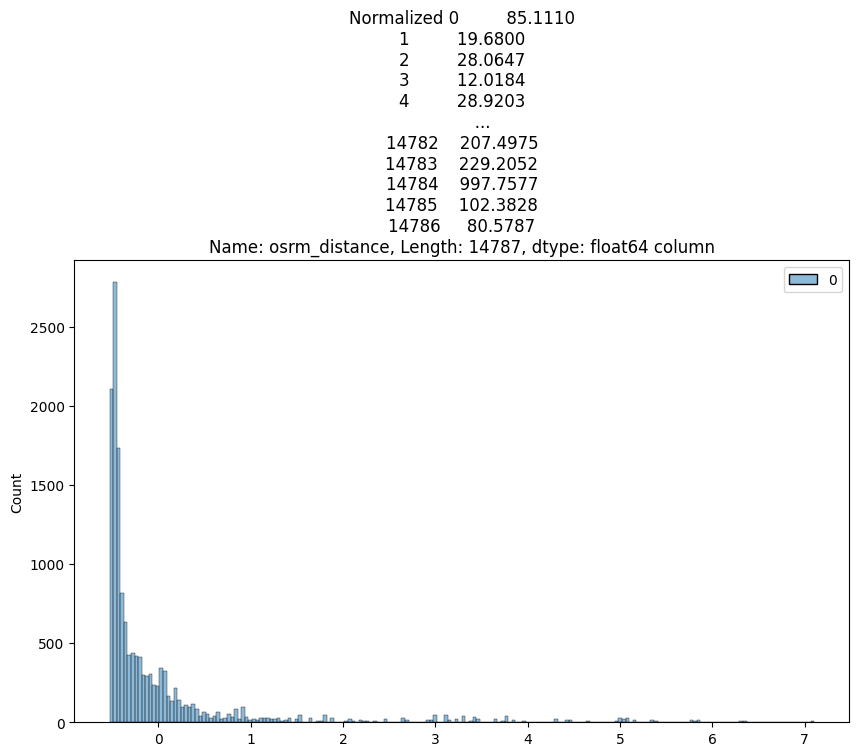

In [281]:
plt.figure(figsize=(10,6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data["osrm_distance"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['osrm_distance']} column")
plt.plot()

[]

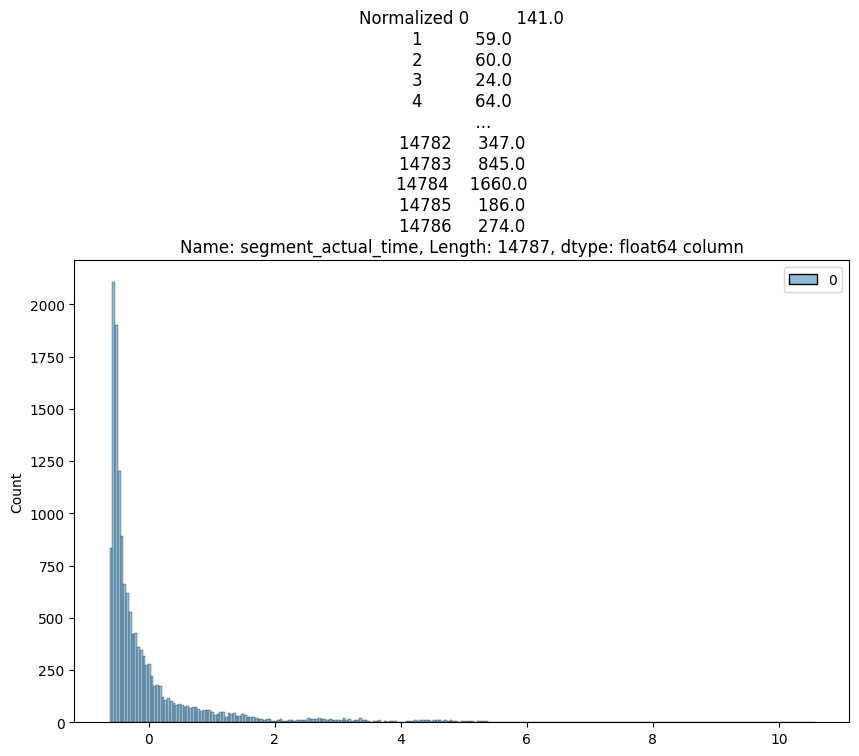

In [282]:
plt.figure(figsize=(10,6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data["segment_actual_time"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['segment_actual_time']} column")
plt.plot()

[]

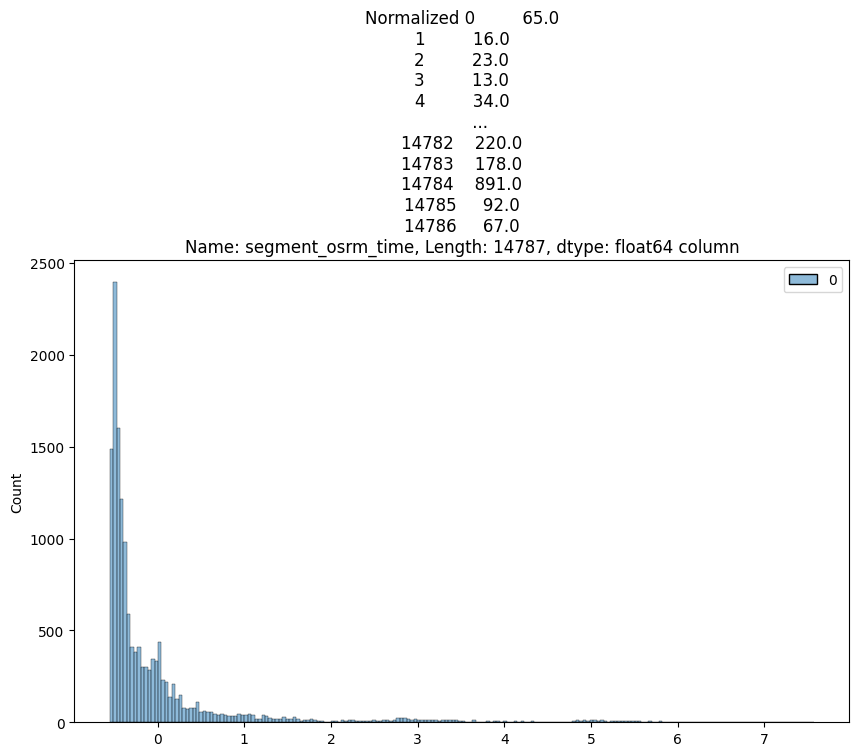

In [283]:
plt.figure(figsize=(10,6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data["segment_osrm_time"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['segment_osrm_time']} column")
plt.plot()

In [ ]:
plt.figure(figsize=(10,6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data["segment_osrm_distance"].to_numpy().reshape(-1,1))
sns.histplot(scaled)
plt.title(f"Normalized {data['segment_osrm_distance']} column")
plt.plot()

Business Insights
1. The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.

2. There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination cities.

3. Most of the data is for testing than for training.

4. Most common route type is Carting.

5. The names of 14 unique location ids are missing in the data.

6. The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

7. Maximum trips are created in the 38th week.

8. Most orders come mid-month. That means customers usually make more orders in the mid of the month.

9. Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana

10. Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.

11. Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.

12. Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.

13. Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.

14. Features start_scan_to_end_scan and od_total_time(created feature) are statistically similar.

15. Features actual_time & osrm_time are statitically different.

16. Features start_scan_to_end_scan and segment_actual_time are statistically similar.

17. Features osrm_distance and segment_osrm_distance are statistically different from each other.

18. Both the osrm_time & segment_osrm_time are not statistically same.

# Recommendations
1. The OSRM trip planning system needs to be improved. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.

2. osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

3. The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.

4. Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.

5. Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.

6. From state point of view, we might have very heavy traffic in certain states and bad terrain conditions in certain states. This will be a good indicator to plan and cater to demand during peak festival seasons.

